<a href="https://colab.research.google.com/github/AnnyKong/cse163-20su-final/blob/master/cse163_final_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install geopandas

     |████████████████████████████████| 972kB 5.7MB/s 
     |████████████████████████████████| 14.7MB 285kB/s 
     |████████████████████████████████| 10.9MB 21.4MB/s 


In [3]:
import os
from os.path import join as pjoin
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# BASE_DIR = "/content/drive/'Shared drives'/cse163-20su/"
# DATA_DIR = "/content/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports"

In [ ]:
% cd /content/
! git clone https://github.com/CSSEGISandData/COVID-19.git

/content
Cloning into 'COVID-19'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 47285 (delta 35), reused 49 (delta 26), pack-reused 47223
Receiving objects: 100% (47285/47285), 365.45 MiB | 26.21 MiB/s, done.
Resolving deltas: 100% (29487/29487), done.
Checking out files: 100% (570/570), done.


In [ ]:
# preprocess data - combine daily reports
# dfs = []
# for csv in os.listdir(DATA_DIR):
#   if csv.endswith('csv'):
#     df = pd.read_csv(pjoin(DATA_DIR, csv))
#     pd.rename()
#     dfs.append(df)
# df = pd.concat(dfs)
# df.reset_index(inplace=True, drop=True)
# ! mkdir -p data/
# df.to_csv('/content/data/combined_daily_reports.csv', index=False)
! cp /content/drive/'Shared drives'/cse163-20su/combined.csv /content/data/


In [4]:
# df = pd.read_csv('/content/data/combined.csv')
# df = df.dropna()
# df

In [ ]:
# df.to_csv('/content/data/combined_nona.csv')

In [ ]:
col_list = data.columns
col_list

Index(['Province_State', 'Country_Region', 'Last_Update', 'Confirmed',
       'Deaths', 'Recovered', 'FIPS', 'Admin2', 'Latitude', 'Longitude',
       'Active', 'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')

In [227]:
# is_long = df['Longitude'] == -66.388913
# is_lat = df['Latitude'] == 	17.994525
# df[is_long & is_lat]['Confirmed'].sum()
# df['Country_Region'].unique()

In [7]:
# df_confirmed = df[['Latitude', 'Longitude', 'Confirmed']]
# df_confirmed = df[['Last_Update', 'Latitude', 'Longitude', 'Confirmed']].dropna()
# df_confirmed['Last_Update'] = df_confirmed['Last_Update'].apply(pd.to_datetime)
# is_may = df_confirmed['Last_Update'].dt.month == 5
# df_confirmed['Last_Update'].dt.month.unique()

In [6]:
# df_confirmed = df_confirmed[is_may].groupby(['Latitude', 'Longitude'])['Confirmed'].sum().reset_index(name='Confirmed') 
# df_confirmed.sort_values('Confirmed')

In [8]:
# geo_data = df_confirmed
# geo_data['coordinates'] = [
#     Point(long, lat) 
#     for long, lat 
#     in zip(geo_data['Longitude'], geo_data['Latitude'])
# ]
# geo_data = geo_data.sort_values('Confirmed')

In [ ]:
# ! mkdir /content/img

In [ ]:
# ! mkdir /content/data/countries/
# ! cp /content/drive/'Shared drives'/cse163-20su/data/* /content/data/countries/

In [11]:
# countries = gpd.read_file('/content/data/countries/ne_110m_admin_0_countries.shp')

In [10]:
# fig, ax = plt.subplots(1, figsize=(30, 14))

# geo_data = gpd.GeoDataFrame(geo_data, geometry='coordinates')
# countries.plot(color='#EEEEEE', markersize=10, ax=ax)
# geo_data.plot(column='Confirmed', markersize=geo_data['Confirmed'] / 10000, legend=True, ax=ax)
# fig.savefig('/content/img/confirmed_geo_vis.png')

In [15]:
def plot_geo_by_month(df, countries, m, t):
  df_type = df
  is_m = df_type['Last_Update'].dt.month == m
  df_type = df_type[is_m].groupby(['Latitude', 'Longitude'])[t].sum().reset_index(name=t) 
  geo_data = df_type
  geo_data['coordinates'] = [
      Point(long, lat) 
      for long, lat 
      in zip(geo_data['Longitude'], geo_data['Latitude'])
  ]
  geo_data = geo_data.sort_values(t)

  fig, ax = plt.subplots(1, figsize=(15, 7))
  geo_data = gpd.GeoDataFrame(geo_data, geometry='coordinates')
  countries.plot(color='#EEEEEE', markersize=10, ax=ax)
  geo_data.plot(column=t, markersize=geo_data[t] / 50000, legend=True, ax=ax)
  ax.set_title('Global Covid-19 ' + t + ' Map - Month ' + str(m))
  fig.savefig('/content/img/' + t + '_geo_vis_' + str(m) + '.png')

In [14]:
df = pd.read_csv('/content/data/combined.csv')
countries = gpd.read_file('/content/data/countries/ne_110m_admin_0_countries.shp')
df = df[['Last_Update', 'Country_Region', 'Longitude', 'Latitude', 'Confirmed', 'Deaths', 'Recovered']].dropna()
df['Last_Update'] = df['Last_Update'].apply(pd.to_datetime)
months = df['Last_Update'].dt.month.unique()

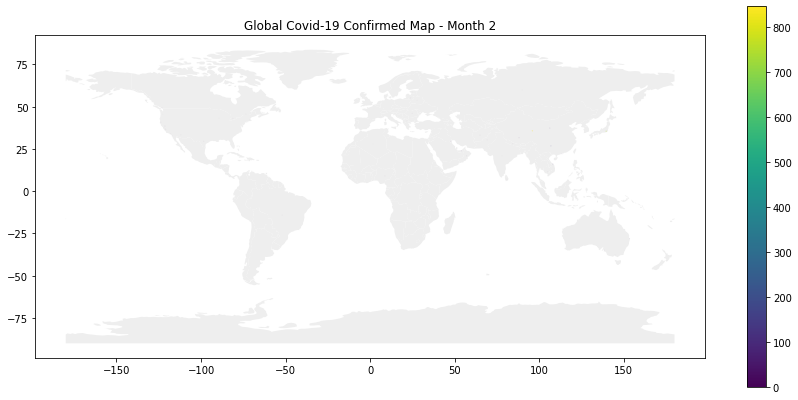

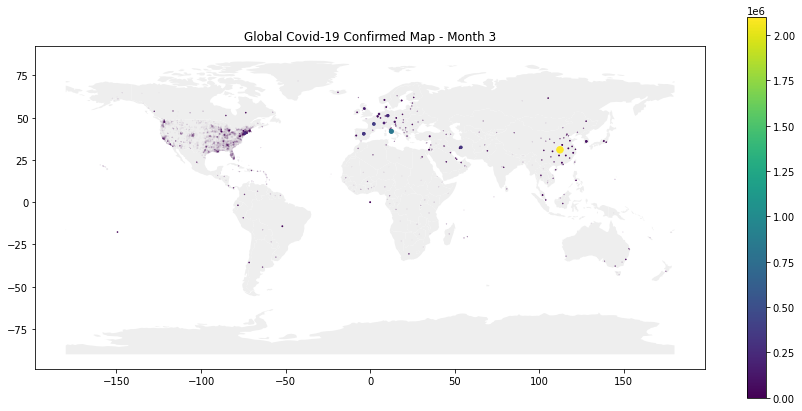

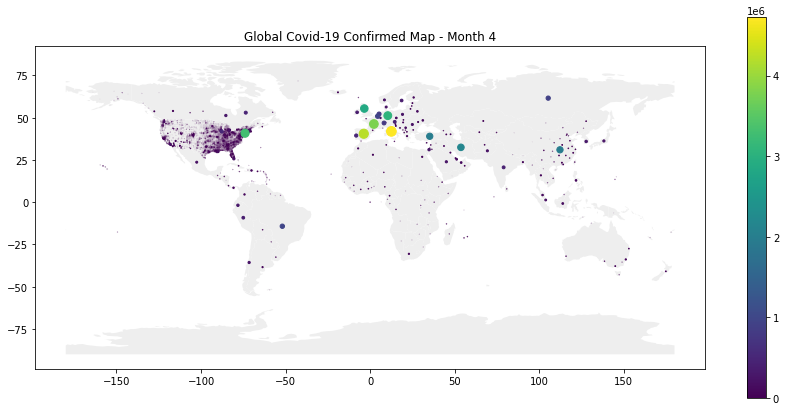

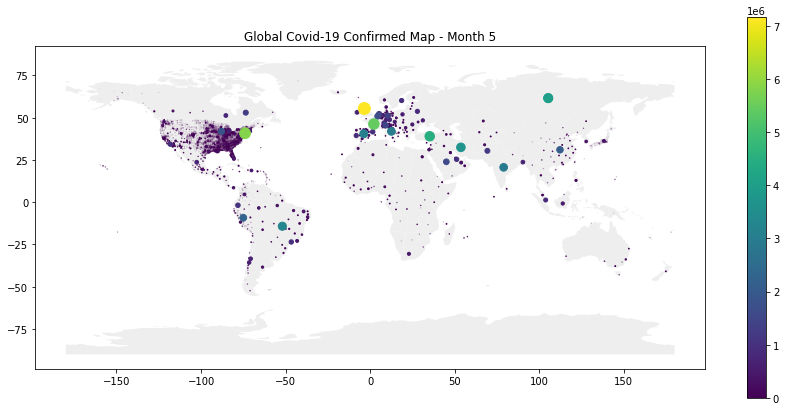

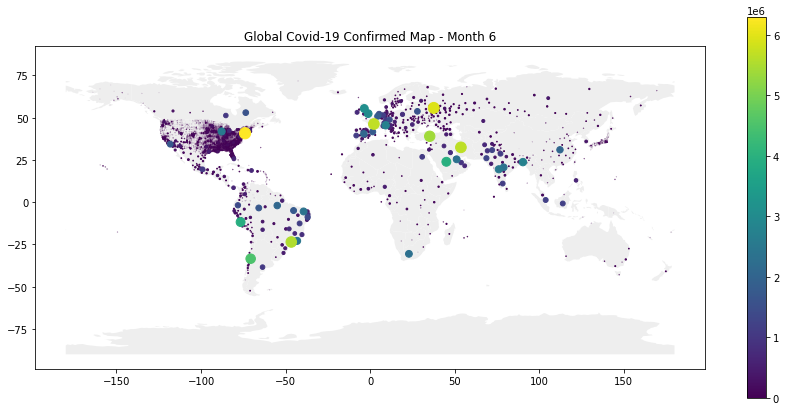

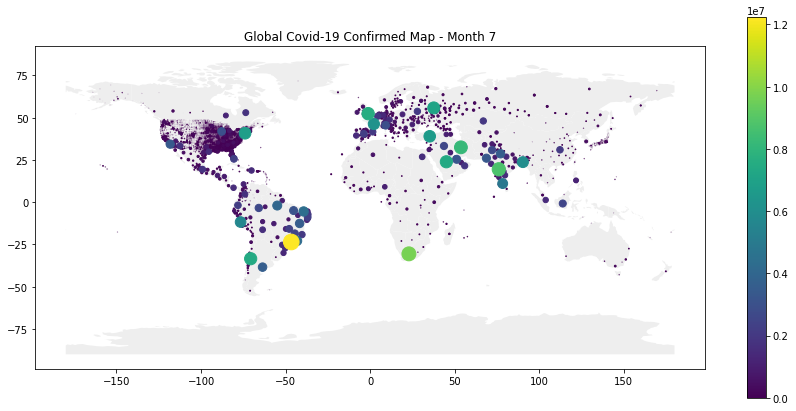

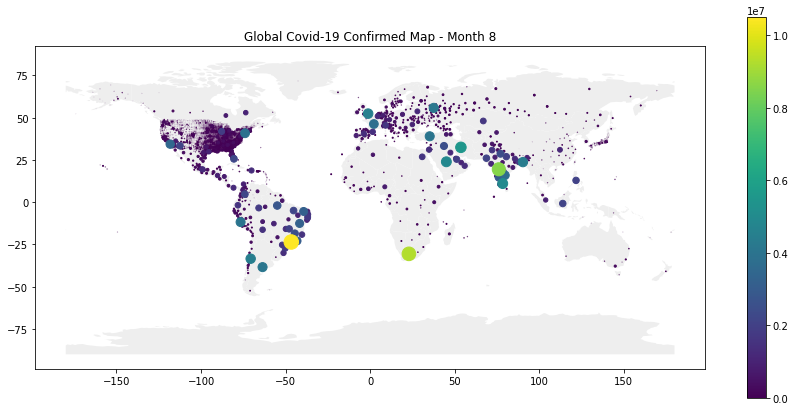

In [271]:
for i in sorted(months):
  plot_geo_by_month(df, countries, i, 'Confirmed')

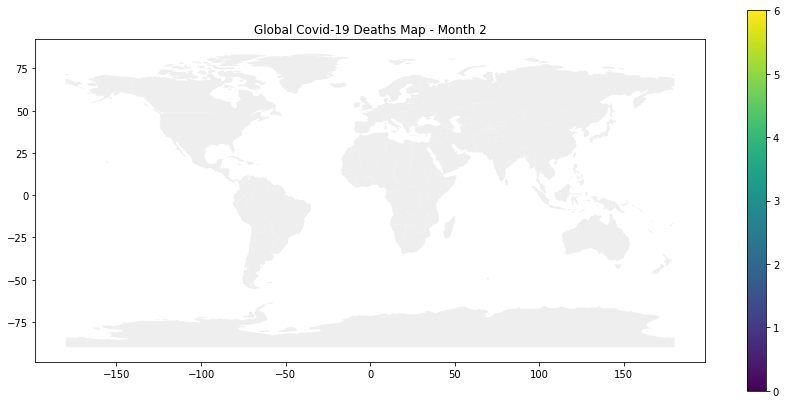

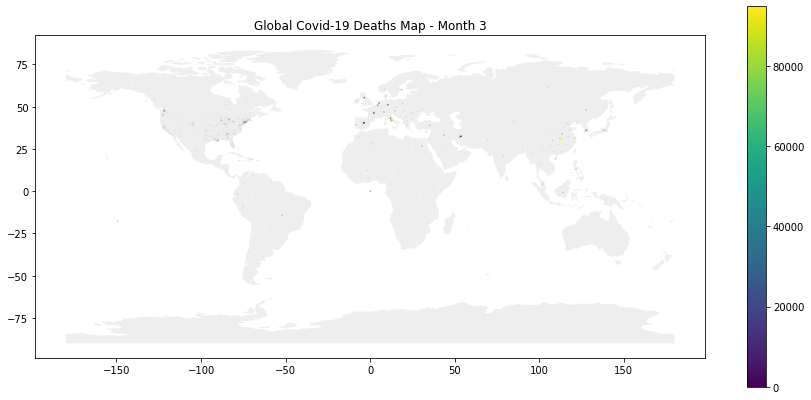

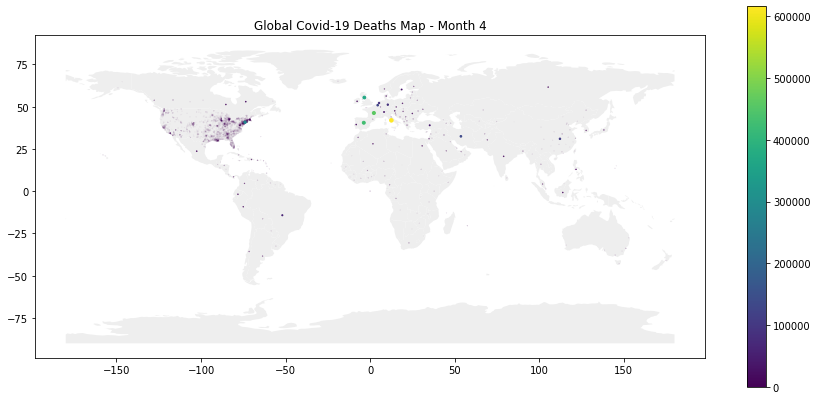

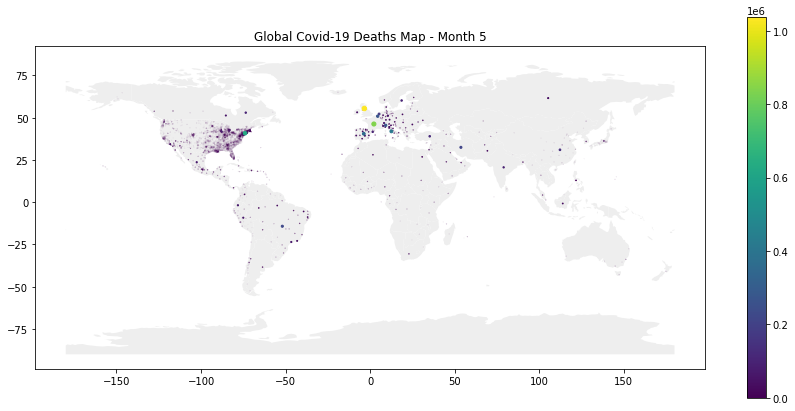

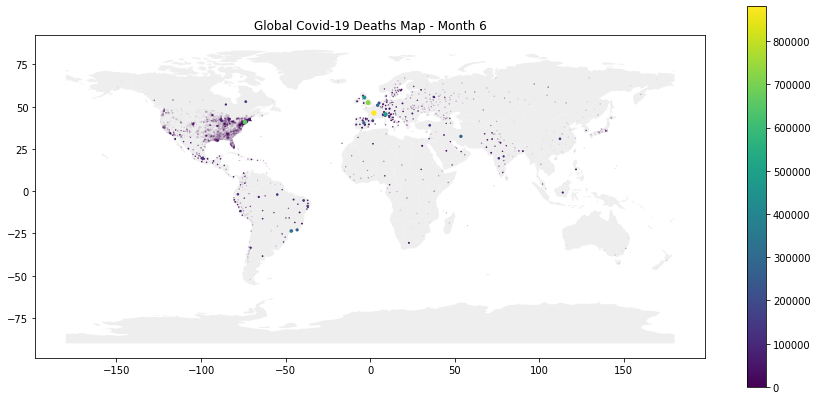

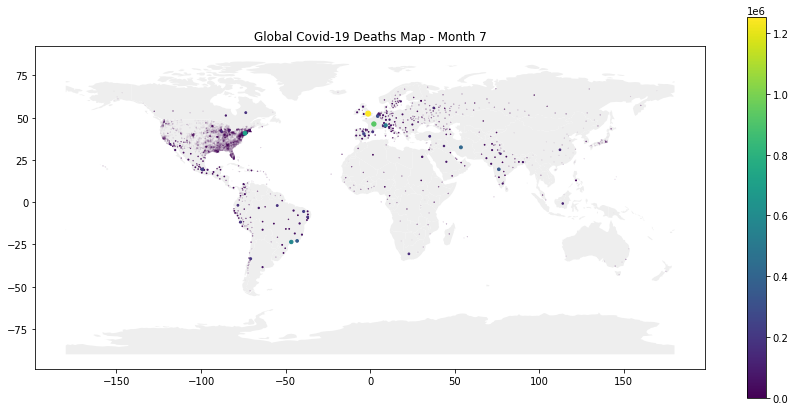

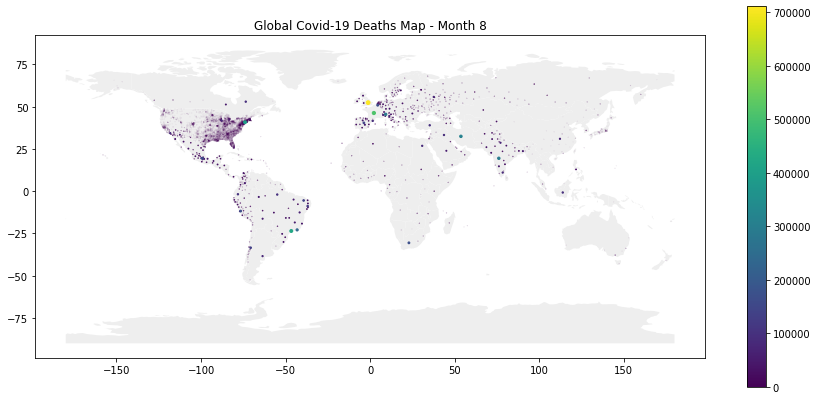

In [272]:
for i in sorted(months):
  plot_geo_by_month(df, countries, i, 'Deaths')

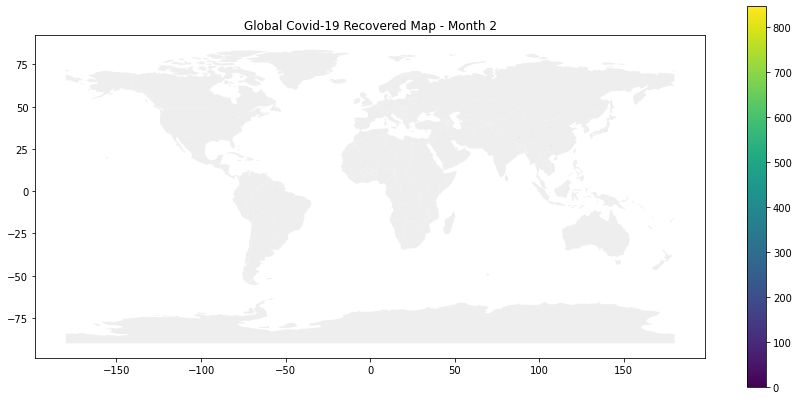

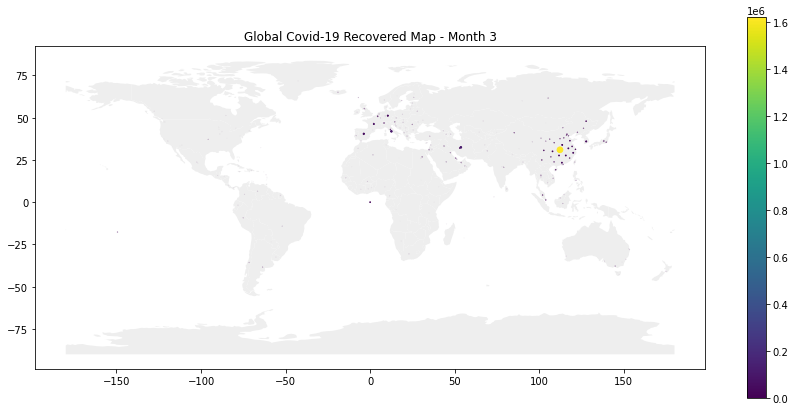

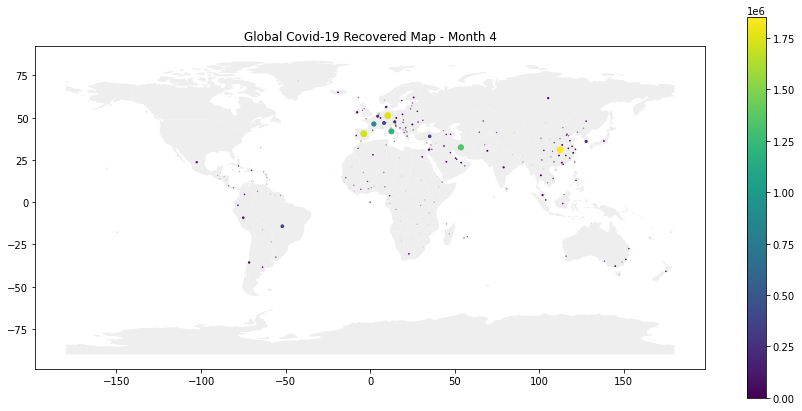

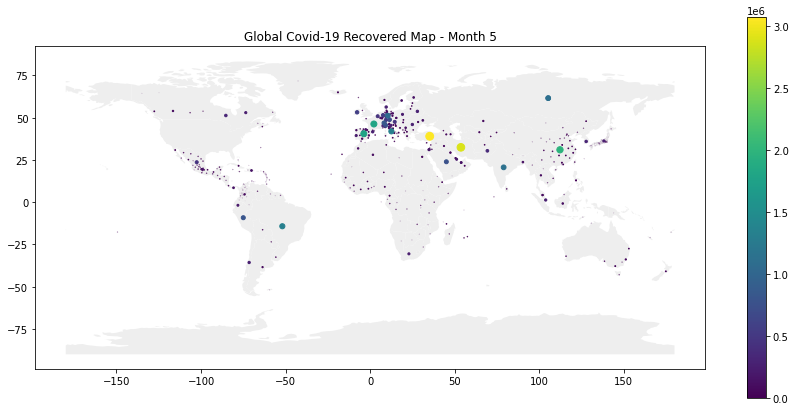

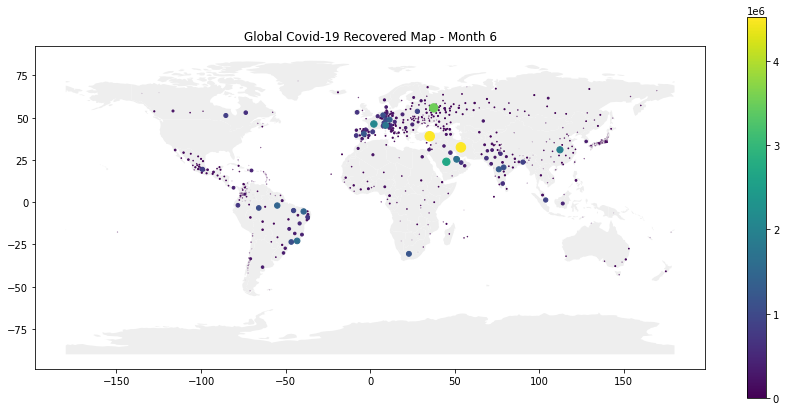

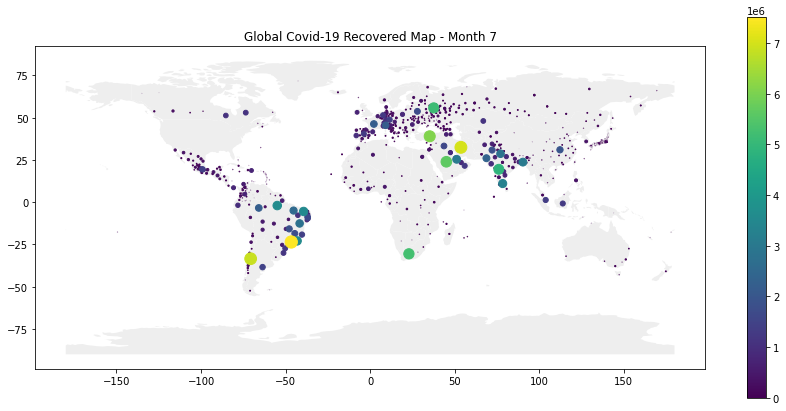

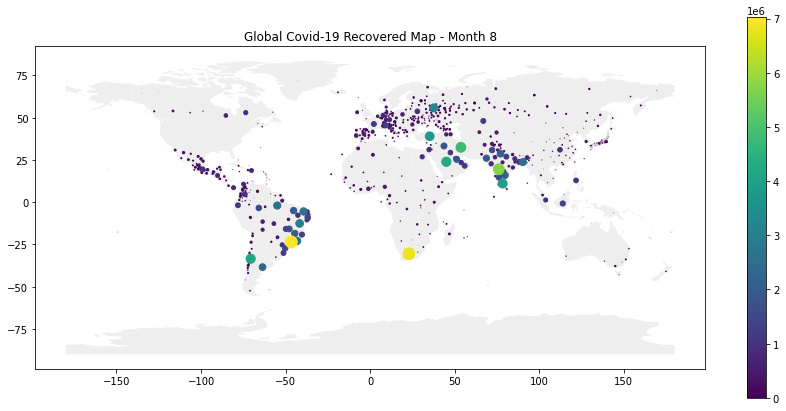

In [273]:
for i in sorted(months):
  plot_geo_by_month(df, countries, i, 'Recovered')

In [309]:
sns.set()
def plot_by_month(df, m, t):
  df_type = df
  is_m = df_type['Last_Update'].dt.month == m
  df_type = df_type[is_m].groupby(['Country_Region'])[t].sum().reset_index(name=t) 

  # fig, ax = plt.subplots(1, figsize=(15, 7))
  sns_plot = sns.catplot(x='Country_Region', y=t, kind='bar', data=df_type, aspect = 6)
  plt.xlabel('Country/Region')
  plt.ylabel("Number of " + t + " cases")
  plt.xticks(rotation=90)
  plt.title('Global Covid-19 ' + t + ' Cases by Country/Region - Month ' + str(m))
  sns_plot.savefig('/content/img/' + t + '_plot_' + str(m) + '.png')

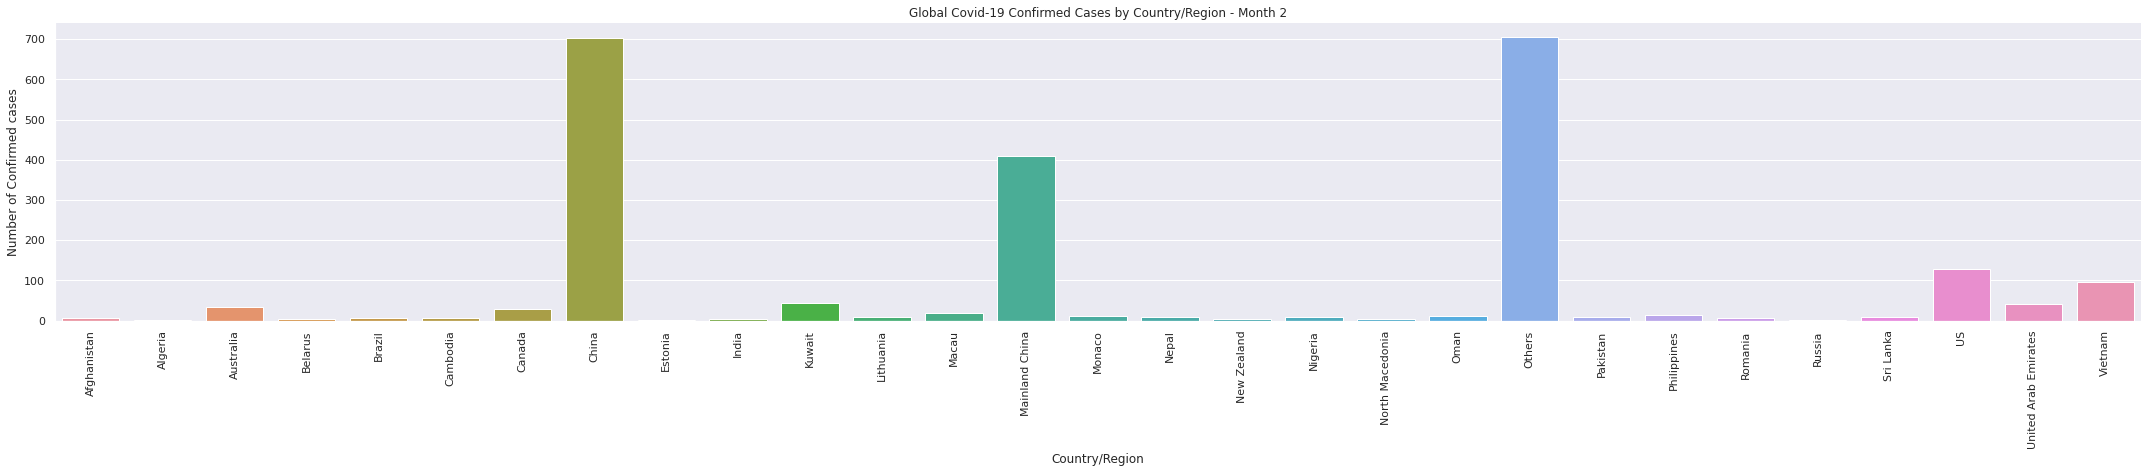

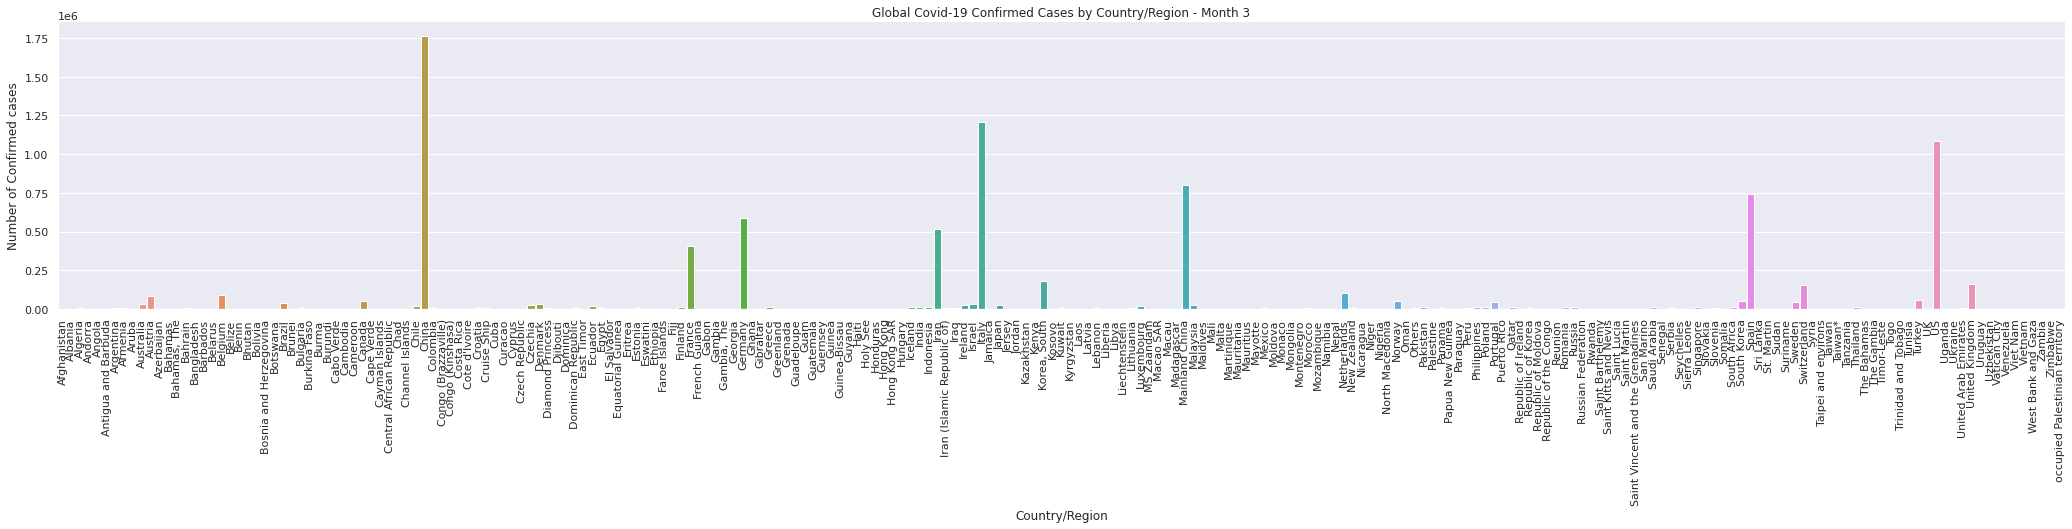

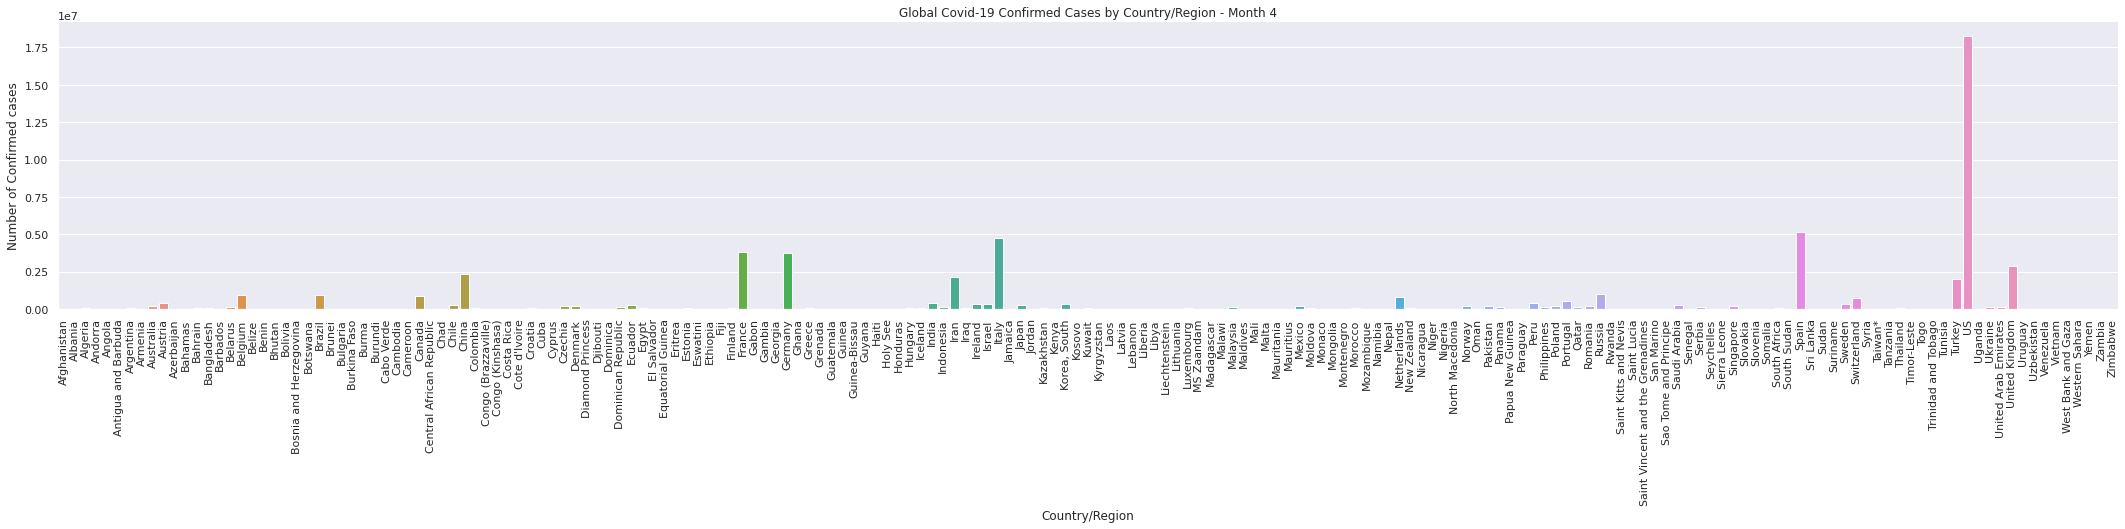

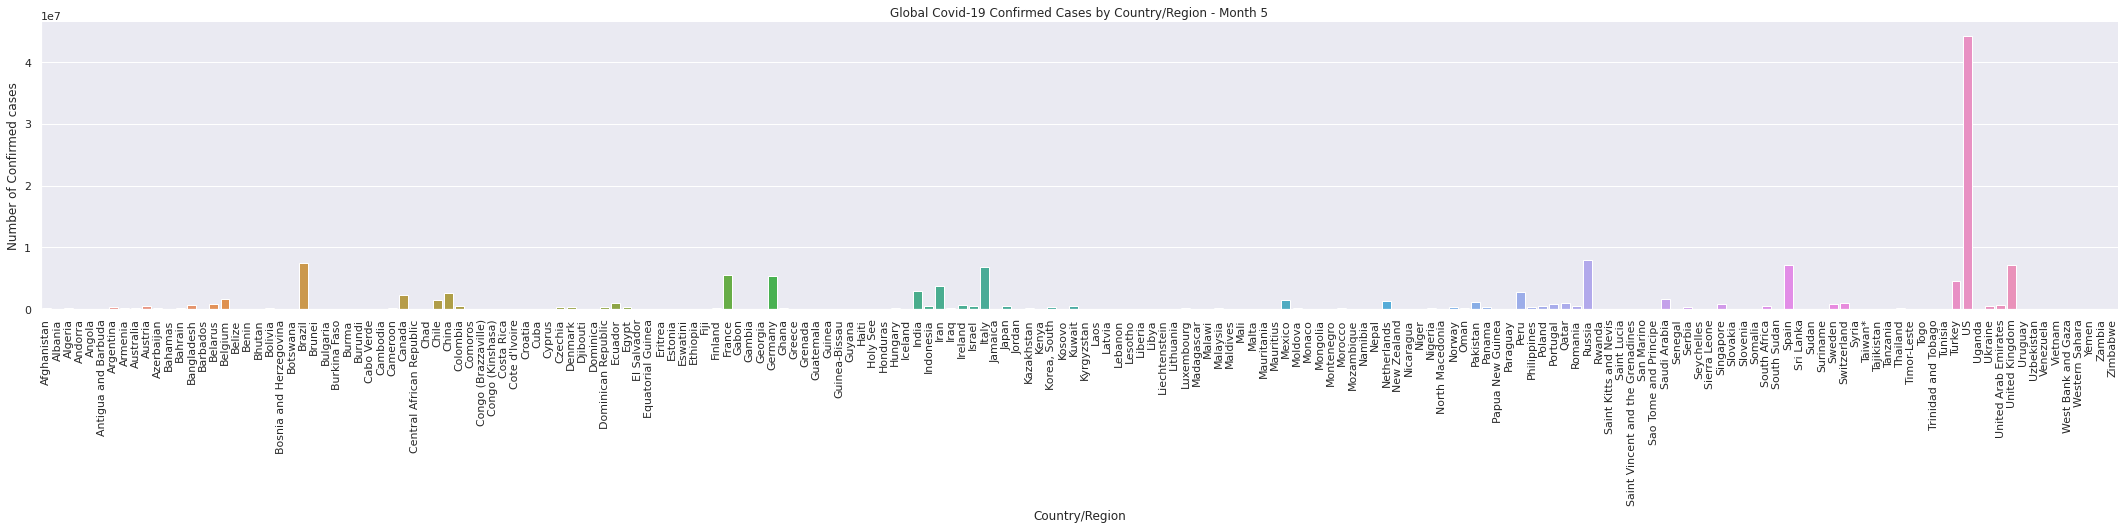

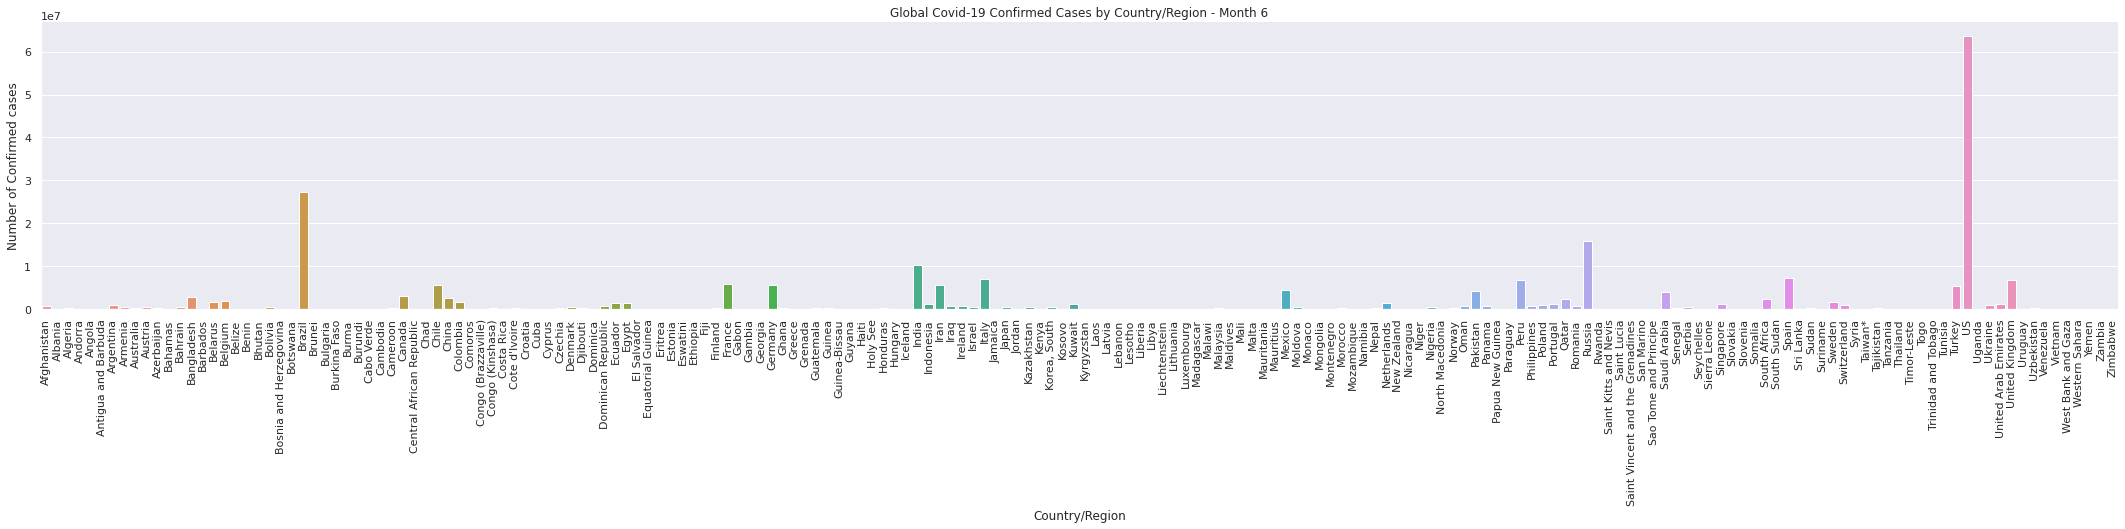

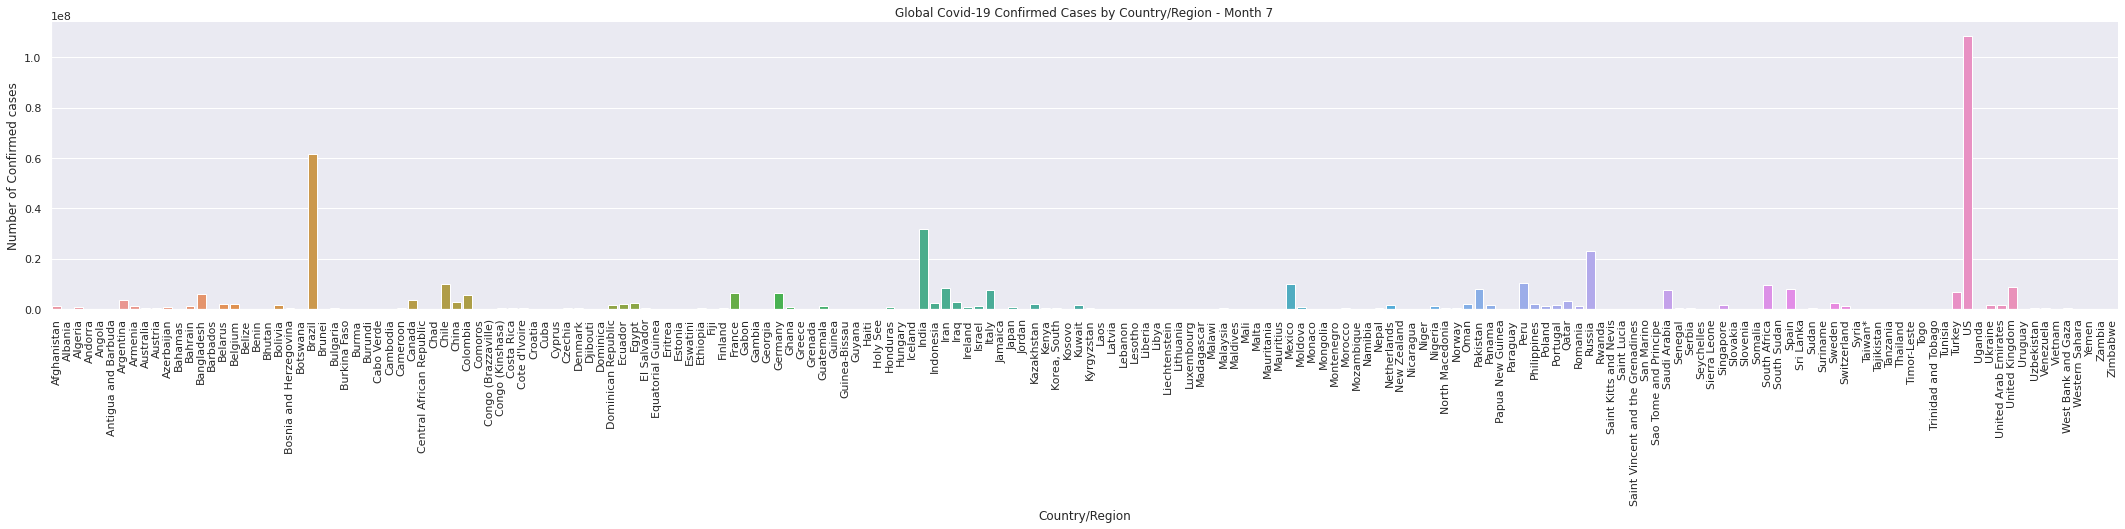

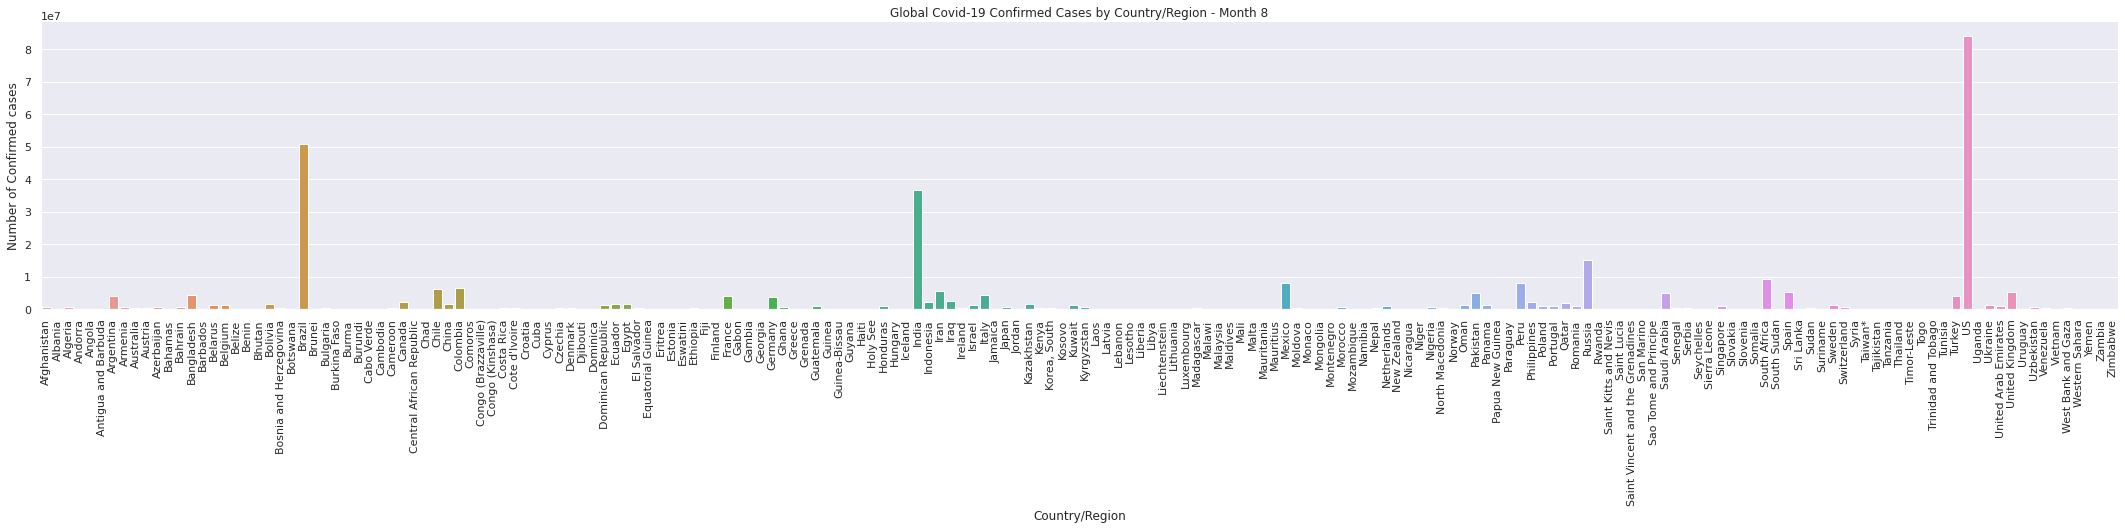

In [311]:
for i in sorted(months):
  plot_by_month(df, i, 'Confirmed')

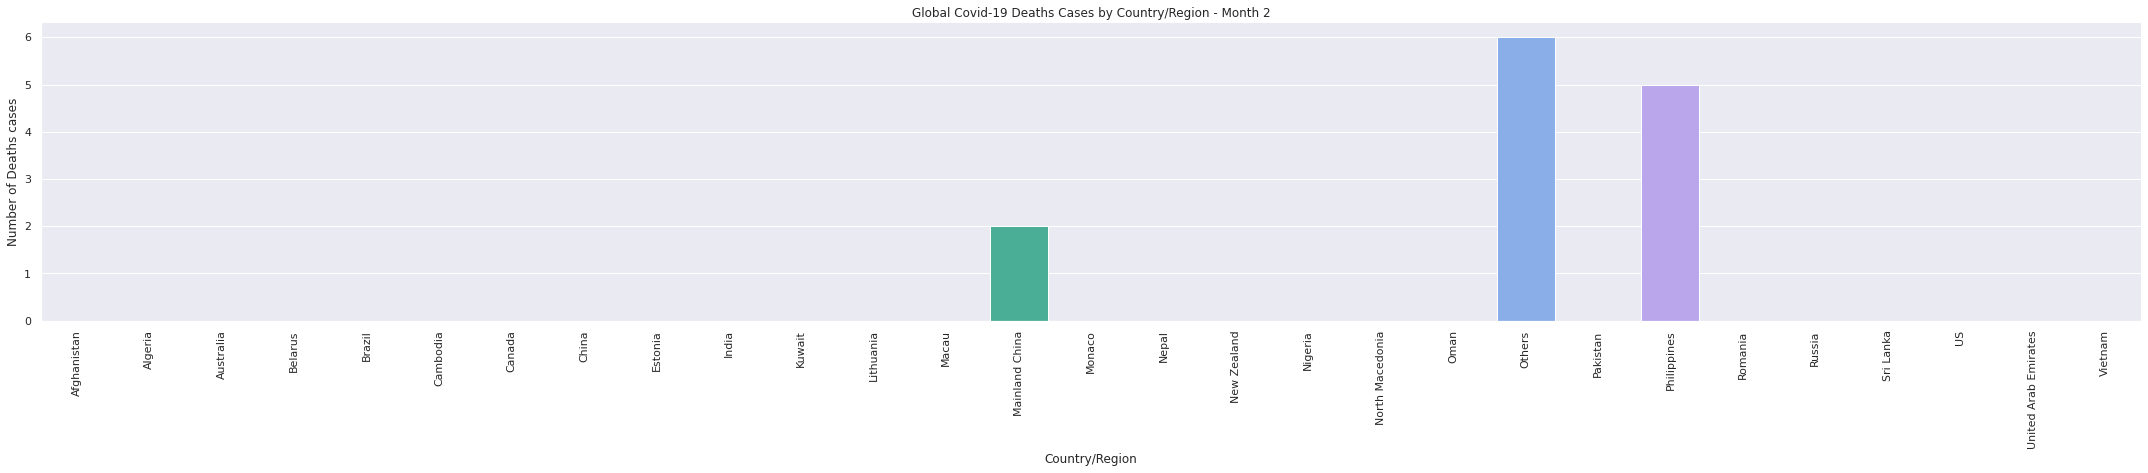

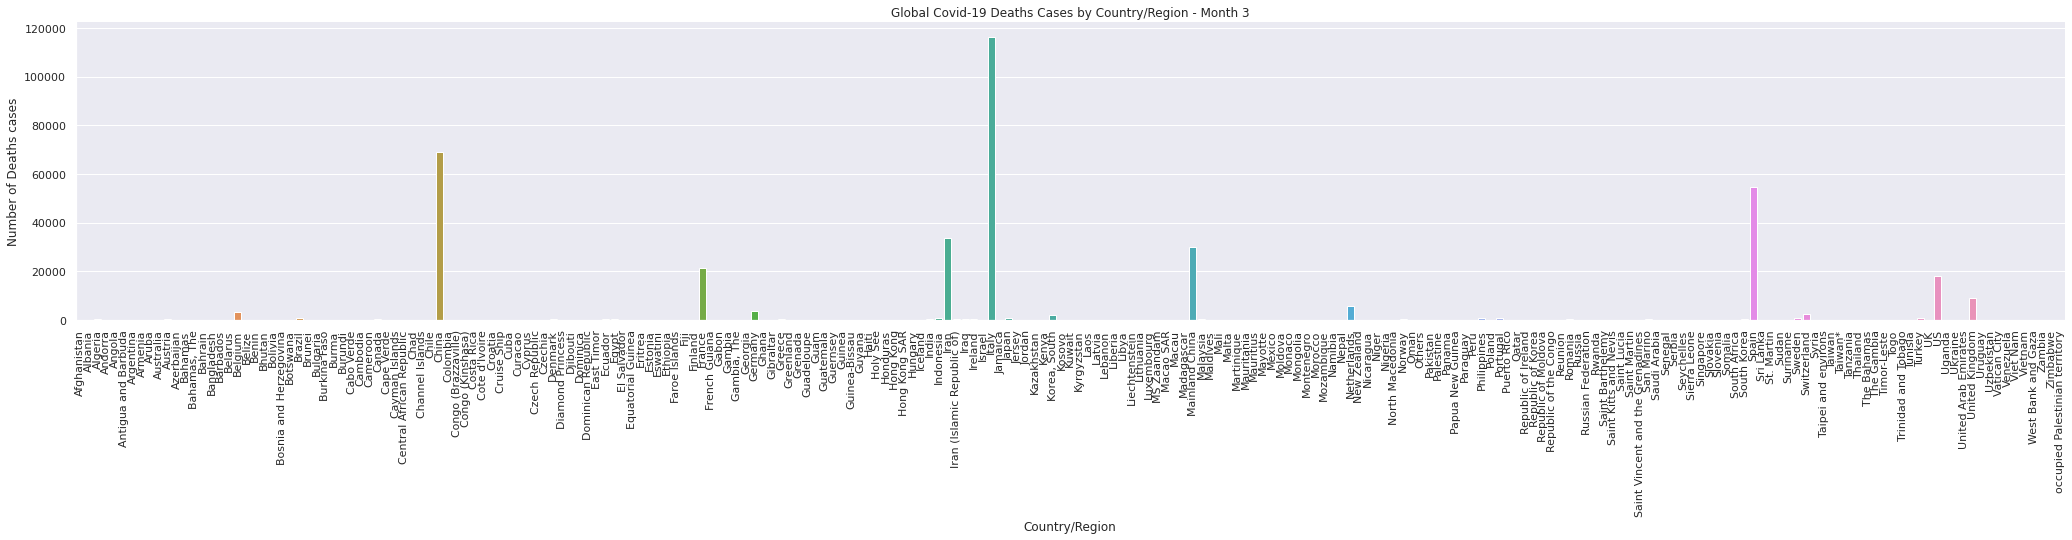

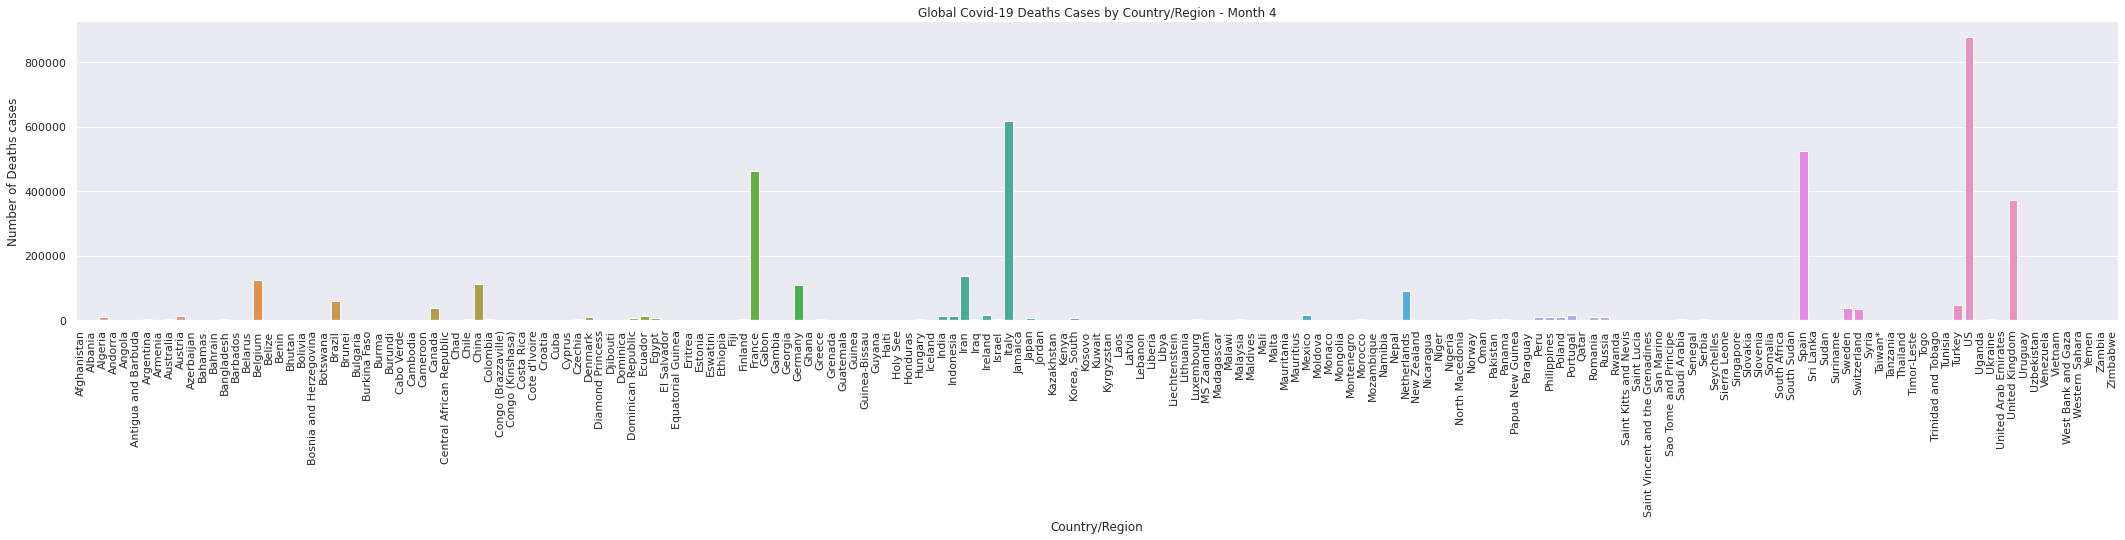

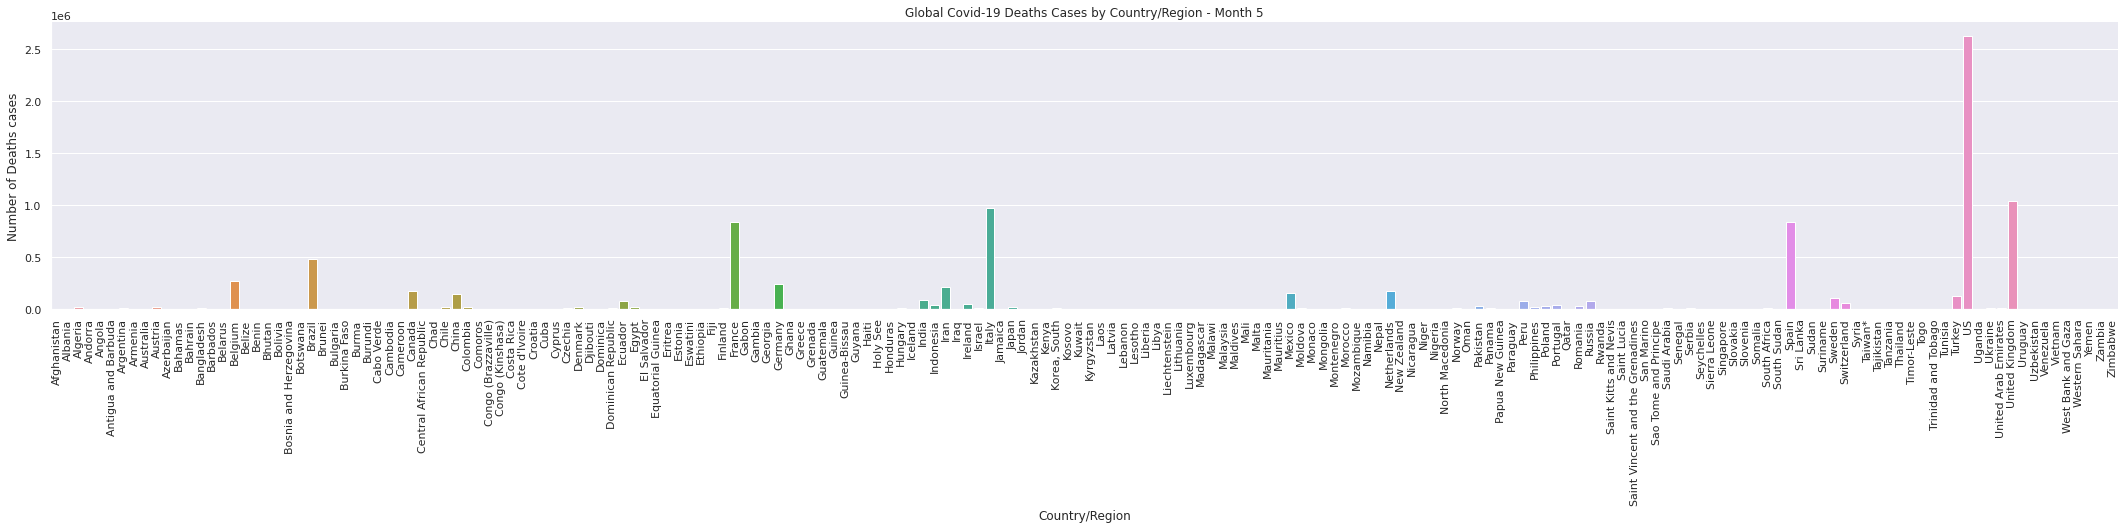

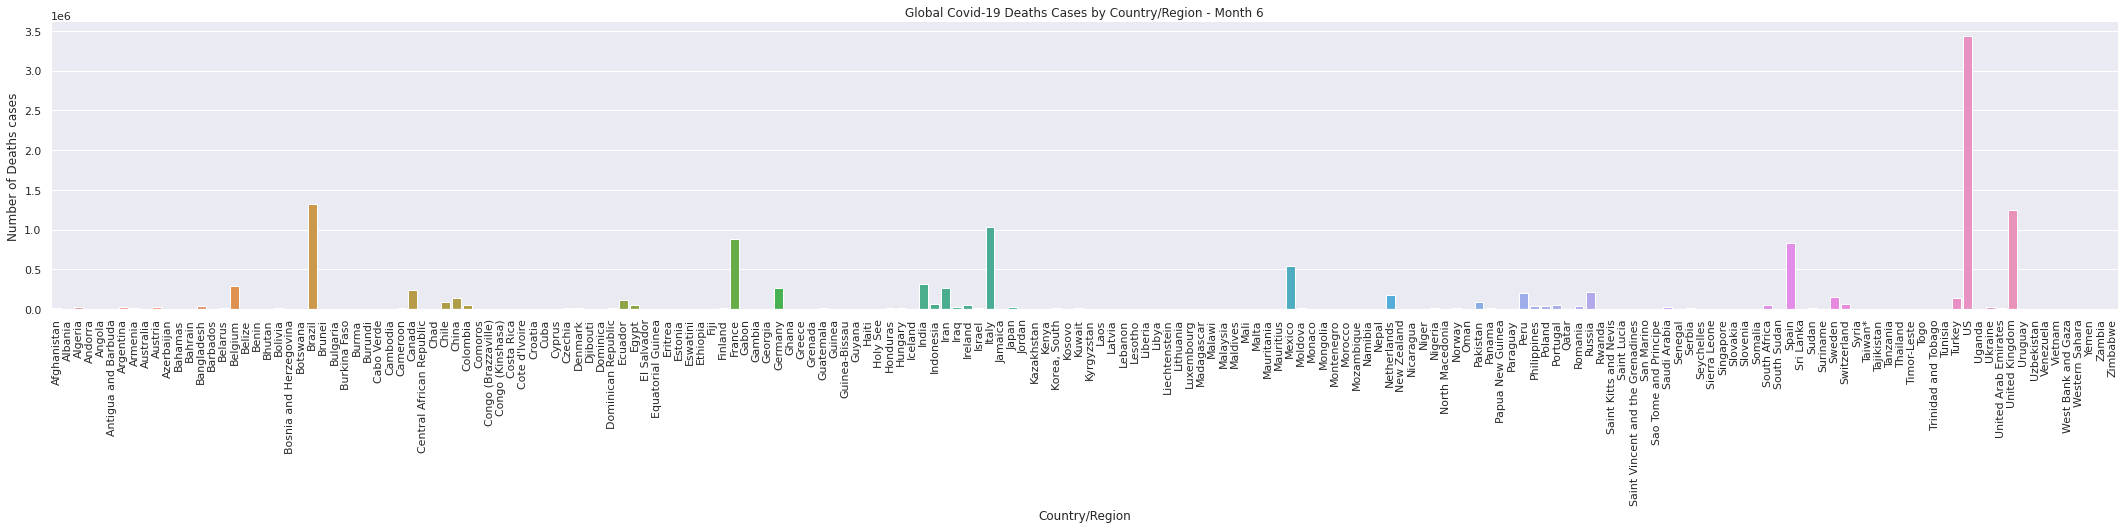

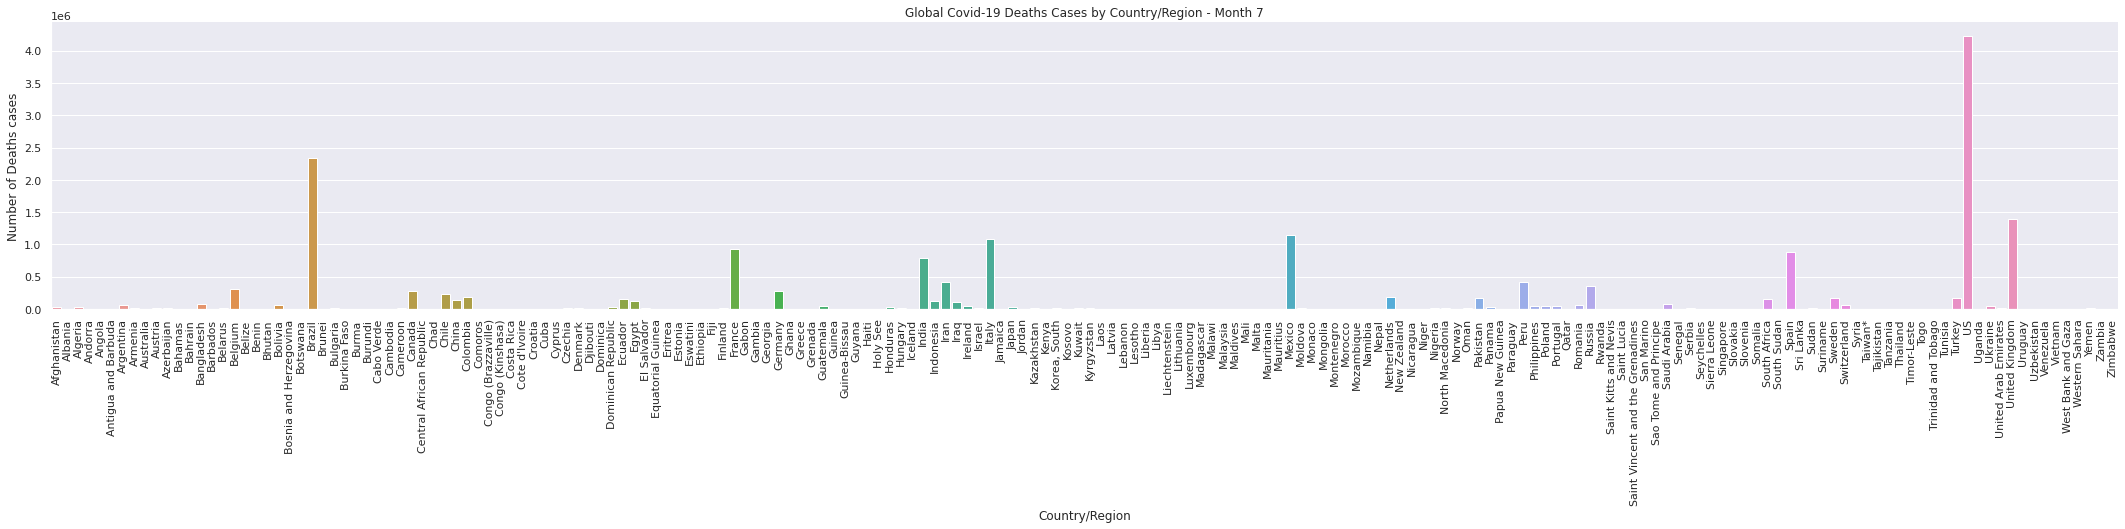

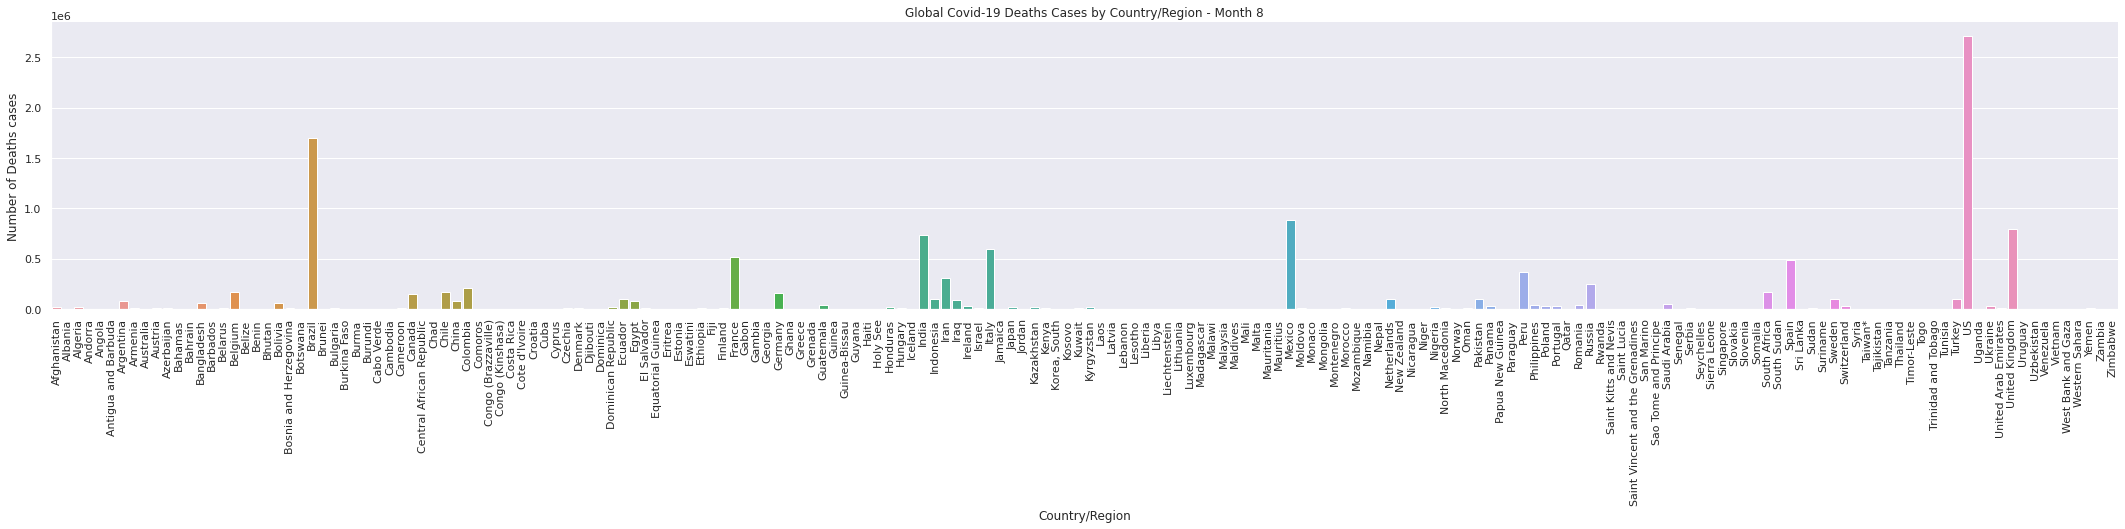

In [312]:
for i in sorted(months):
  plot_by_month(df, i, 'Deaths')

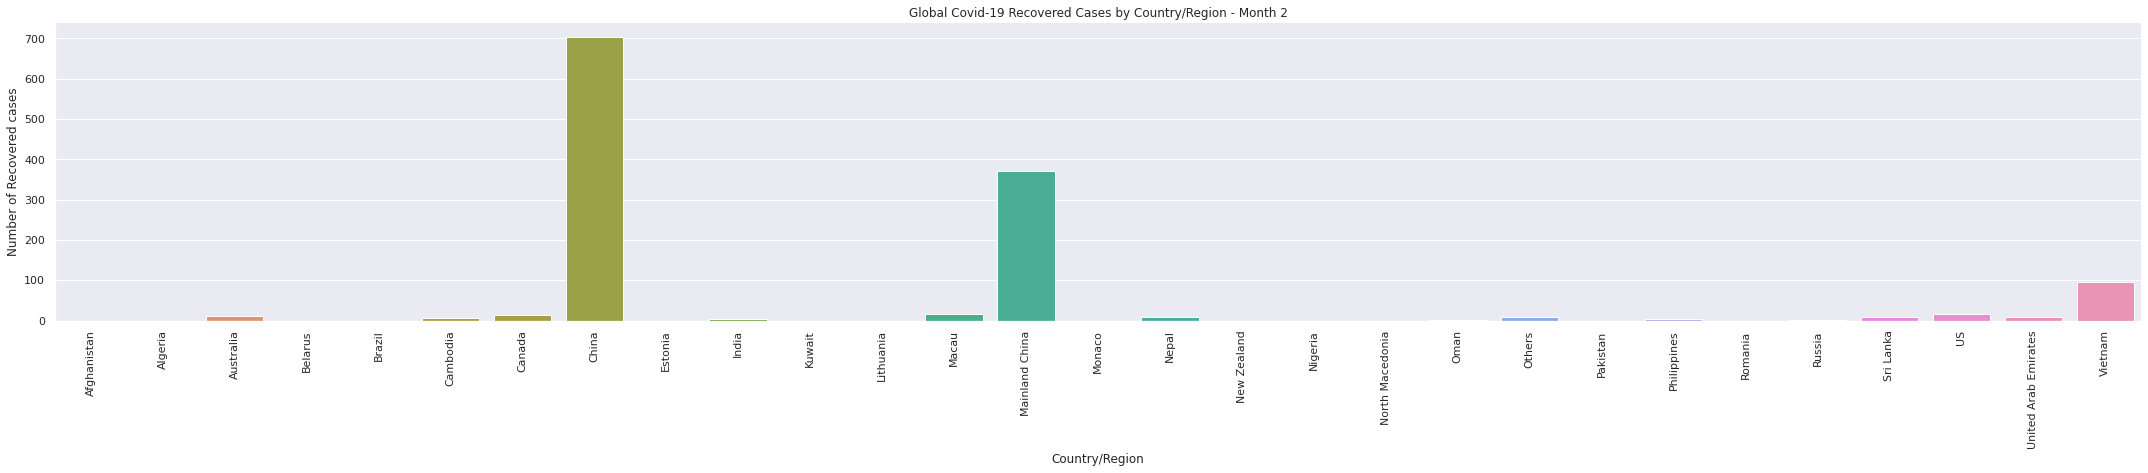

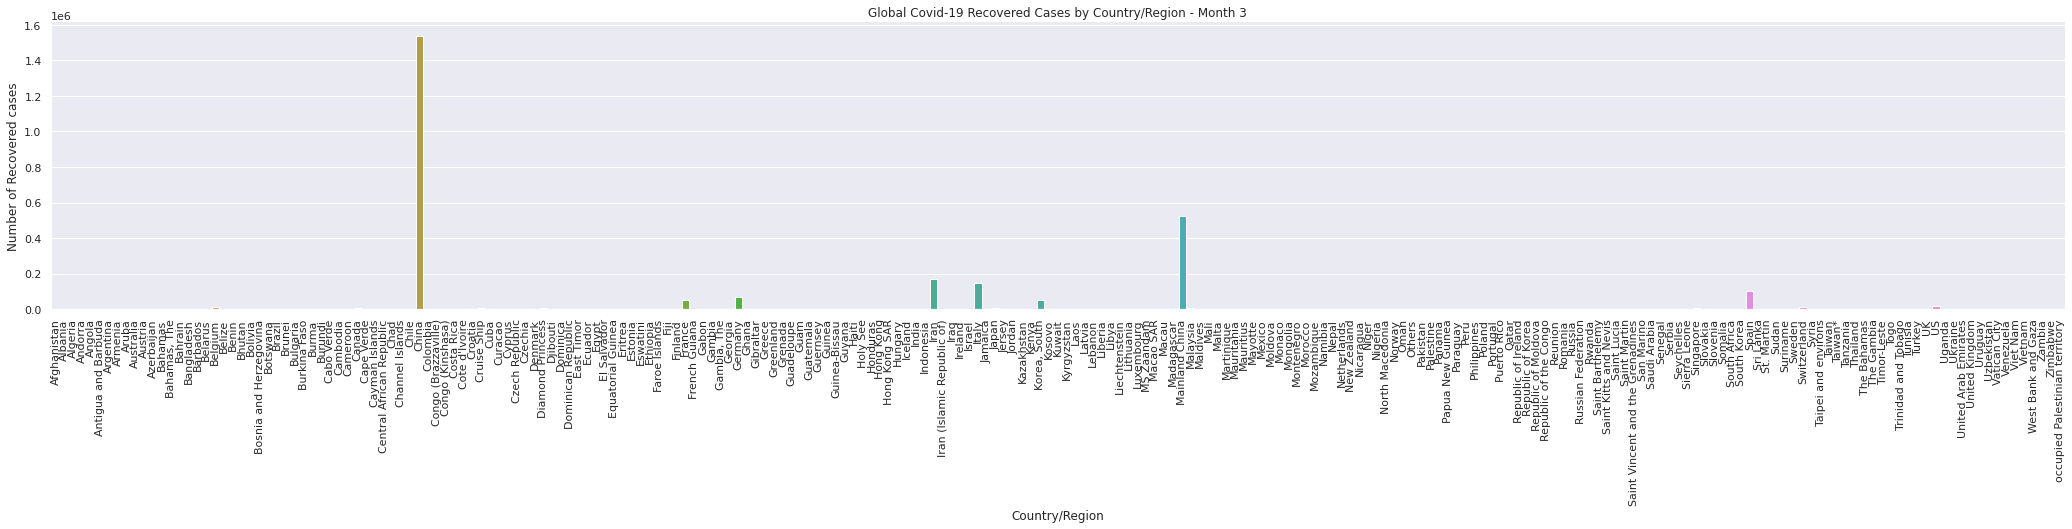

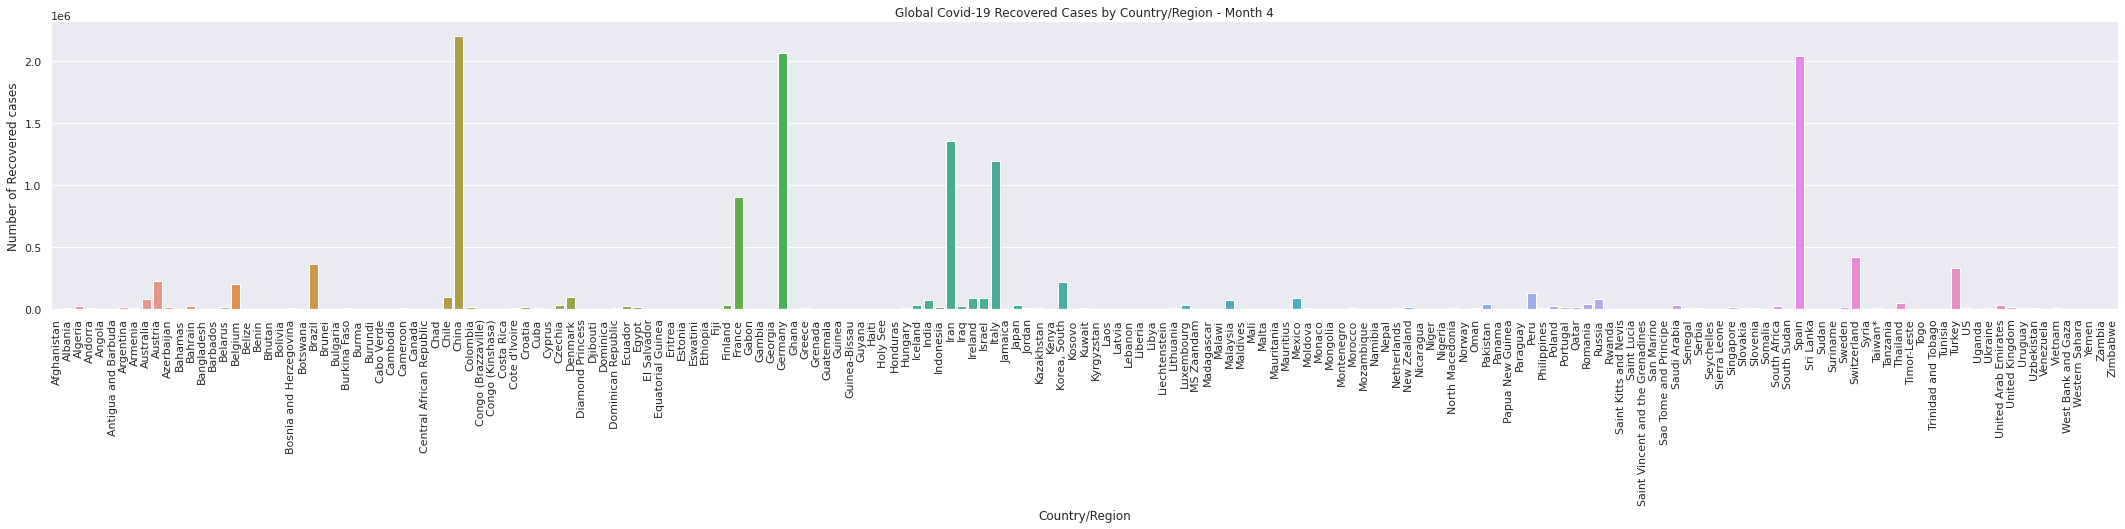

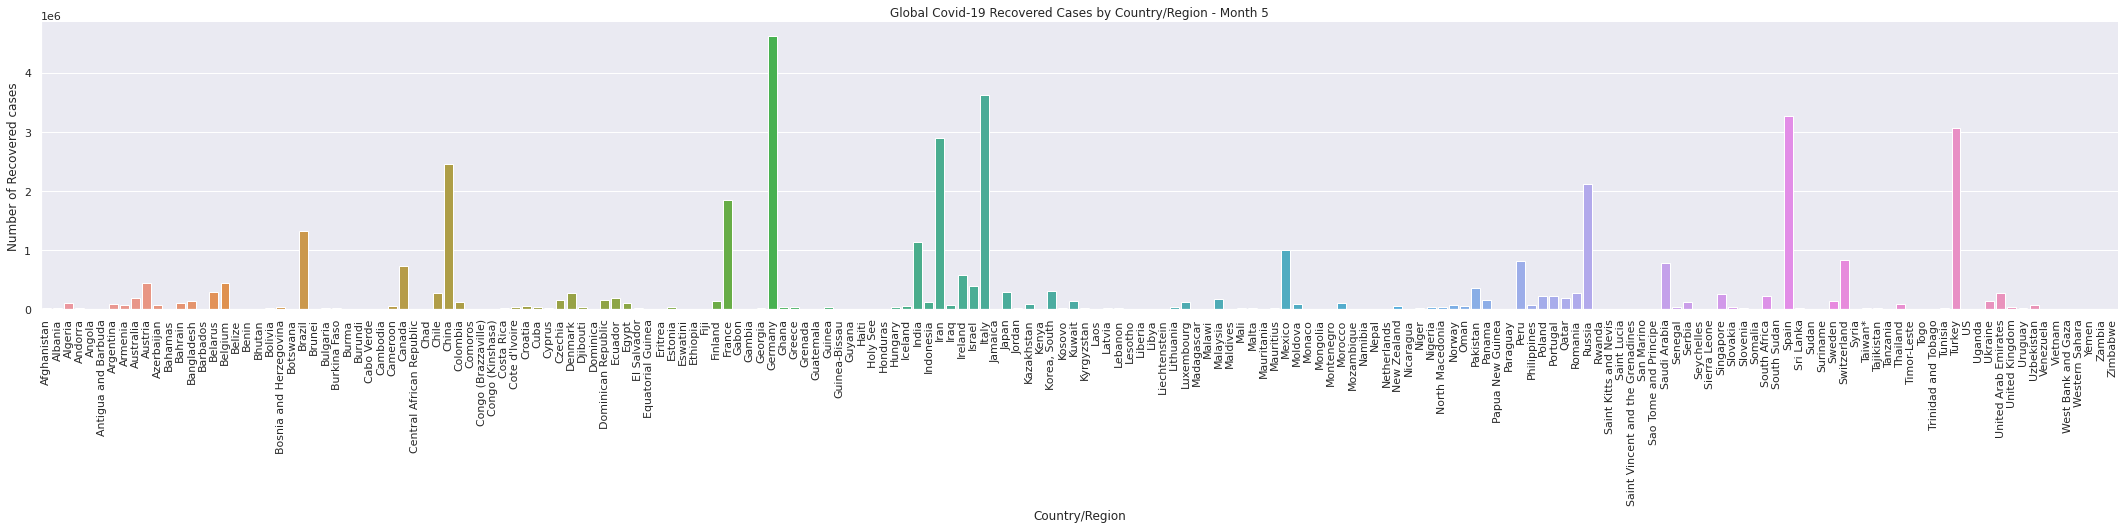

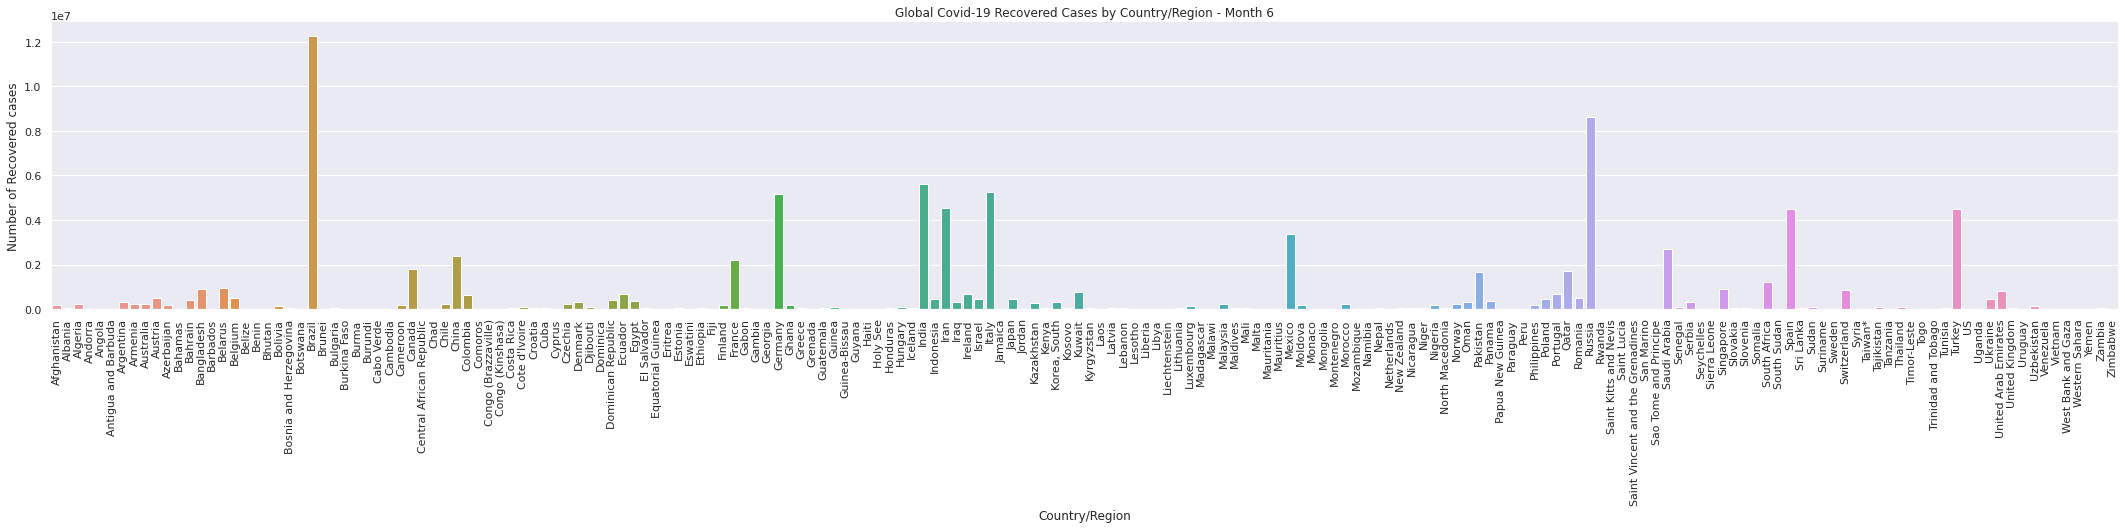

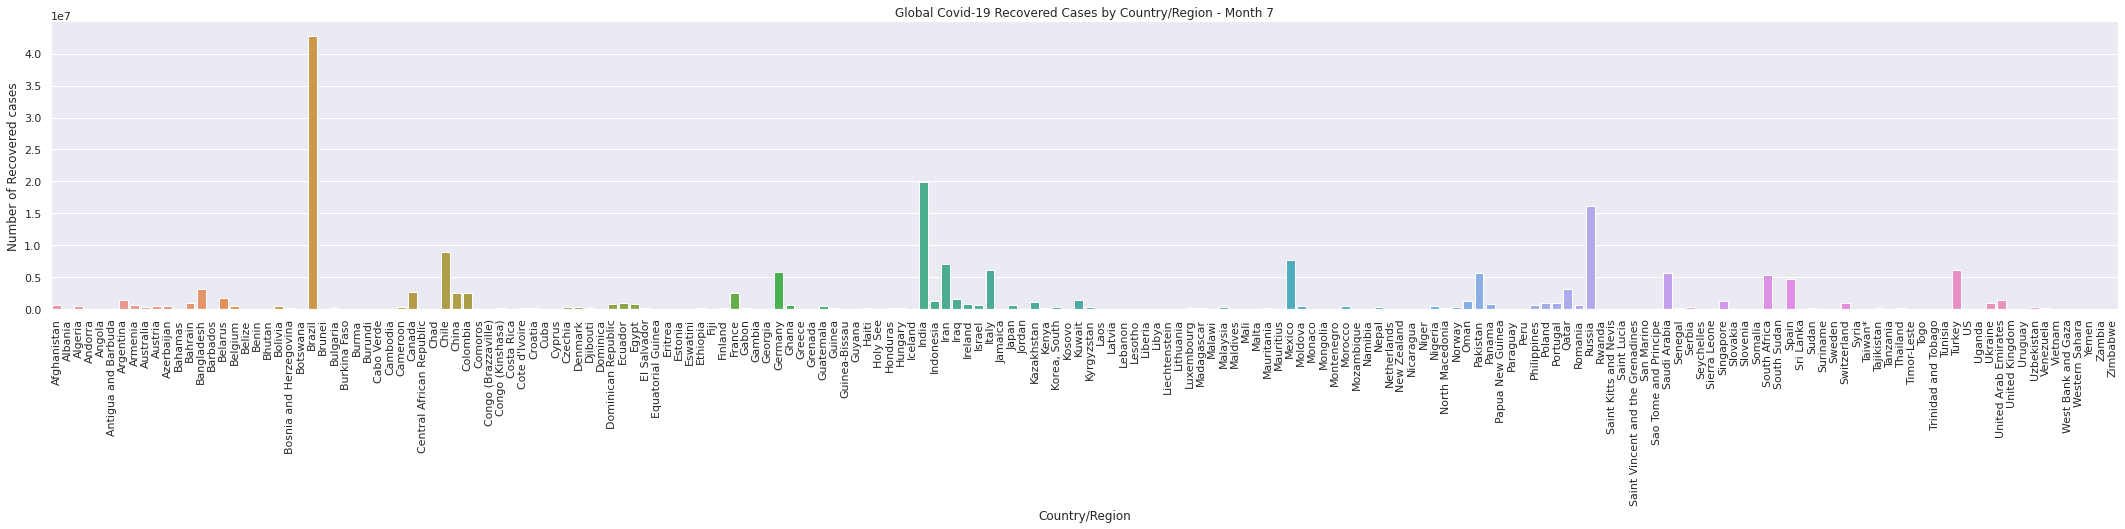

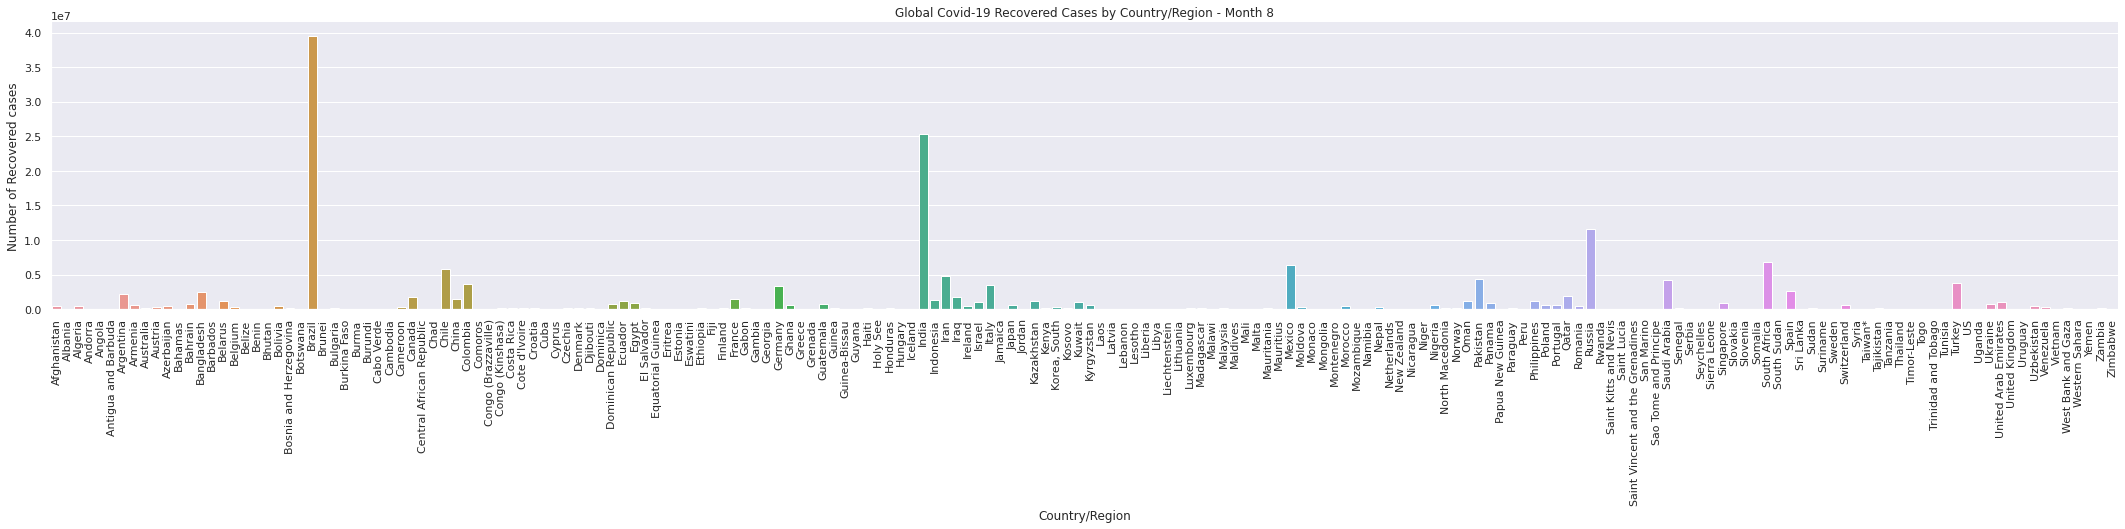

In [314]:
for i in sorted(months):
  plot_by_month(df, i, 'Recovered')

In [16]:
sns.set()
def long_plot_by_month(df, m, t):
  df_type = df
  is_m = df_type['Last_Update'].dt.month == m
  df_type = df_type[is_m].groupby(['Longitude', 'Latitude'])[t].sum().reset_index(name=t) 

  sns_plot = sns.relplot(x='Longitude', y=t, kind='line', data=df_type, aspect = 6)
  plt.xlabel('Longitude')
  plt.ylabel("Number of " + t + " cases")
  plt.xticks(rotation=90)
  plt.title('Global Covid-19 ' + t + ' Cases by Longitude - Month ' + str(m))
  sns_plot.savefig('/content/img/' + t + '_long_plot_' + str(m) + '.png')

In [17]:
sns.set()
def lat_plot_by_month(df, m, t):
  df_type = df
  is_m = df_type['Last_Update'].dt.month == m
  df_type = df_type[is_m].groupby(['Longitude', 'Latitude'])[t].sum().reset_index(name=t) 

  sns_plot = sns.relplot(x='Latitude', y=t, kind='line', data=df_type, aspect = 6)
  plt.xlabel('Latitude')
  plt.ylabel("Number of " + t + " cases")
  plt.xticks(rotation=90)
  plt.title('Global Covid-19 ' + t + ' Cases by Latitude - Month ' + str(m))
  sns_plot.savefig('/content/img/' + t + '_lat_plot_' + str(m) + '.png')

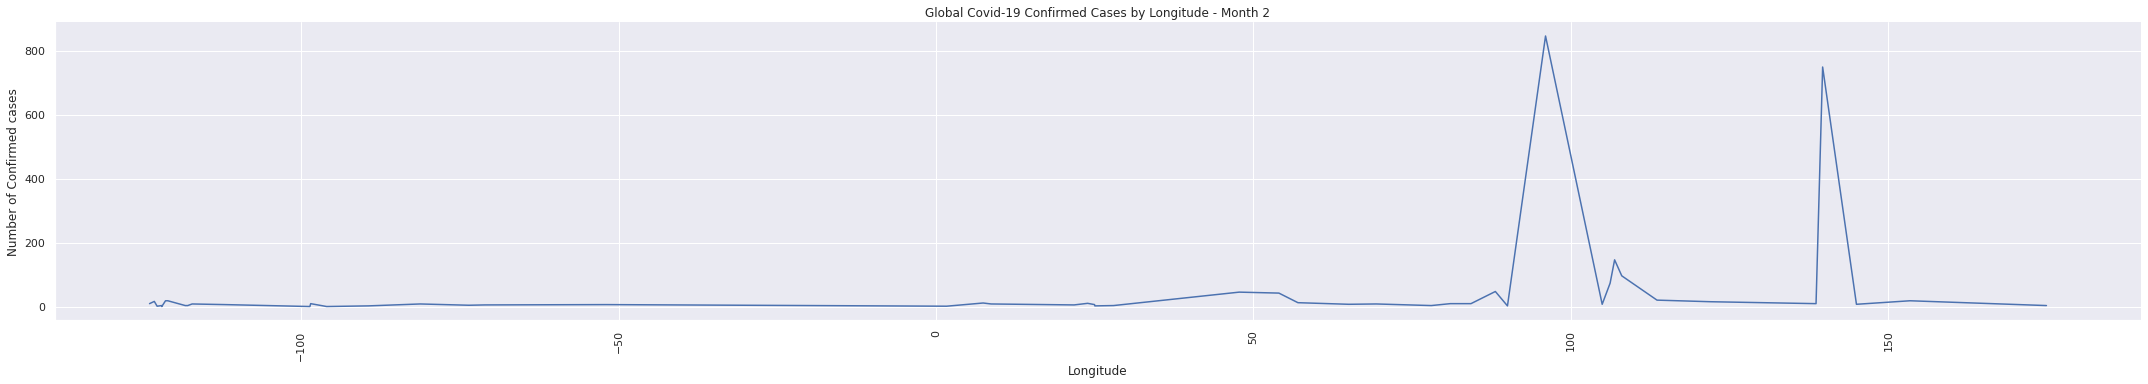

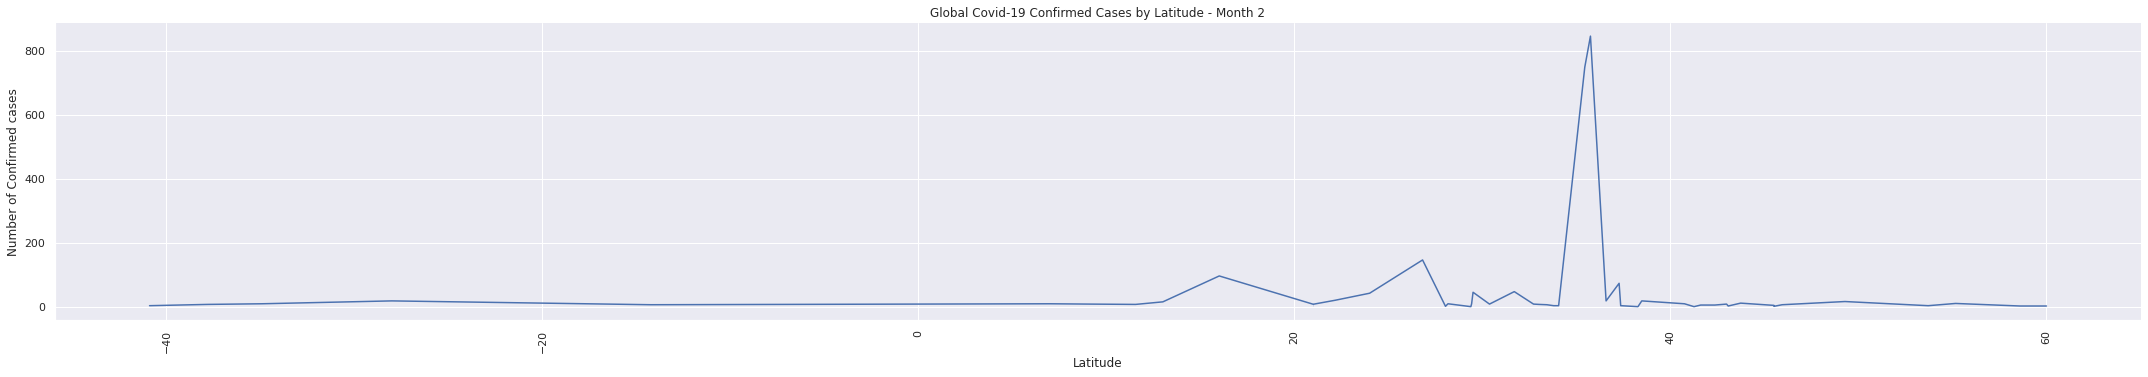

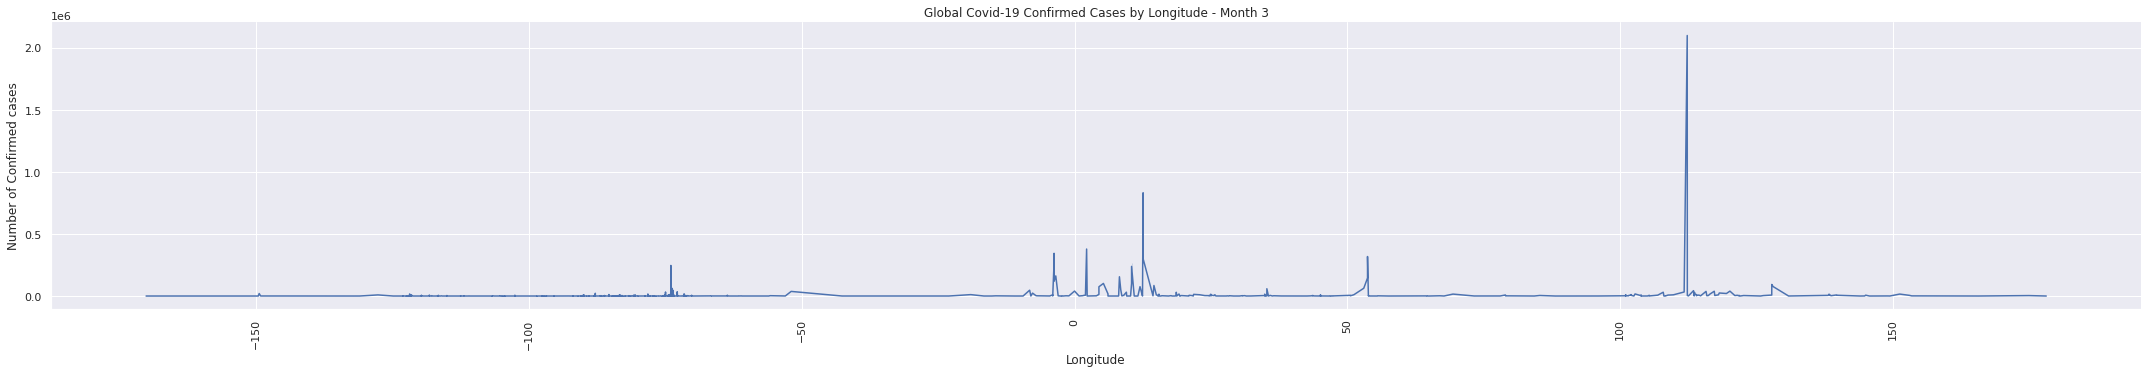

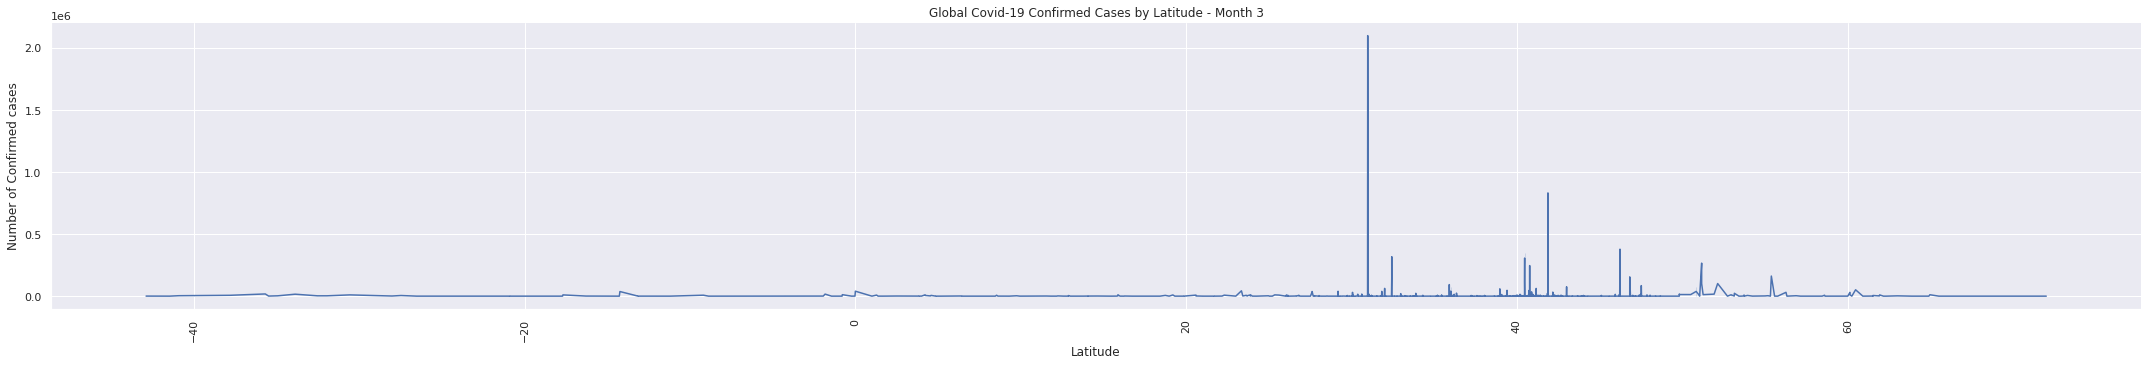

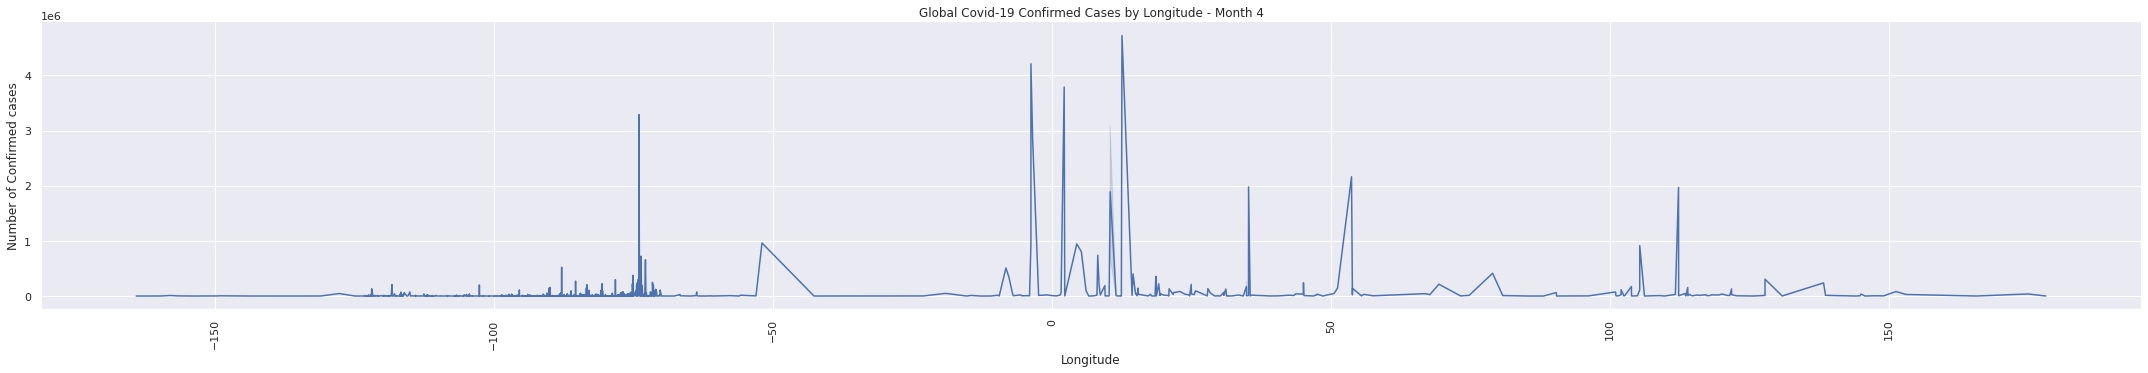

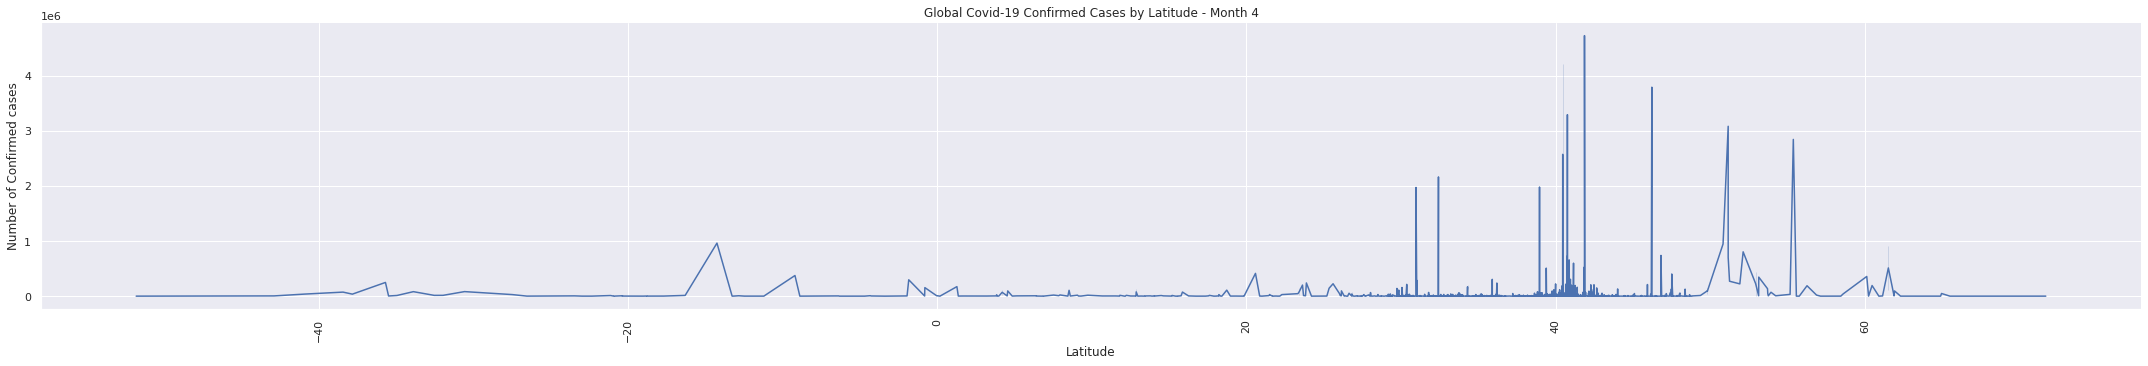

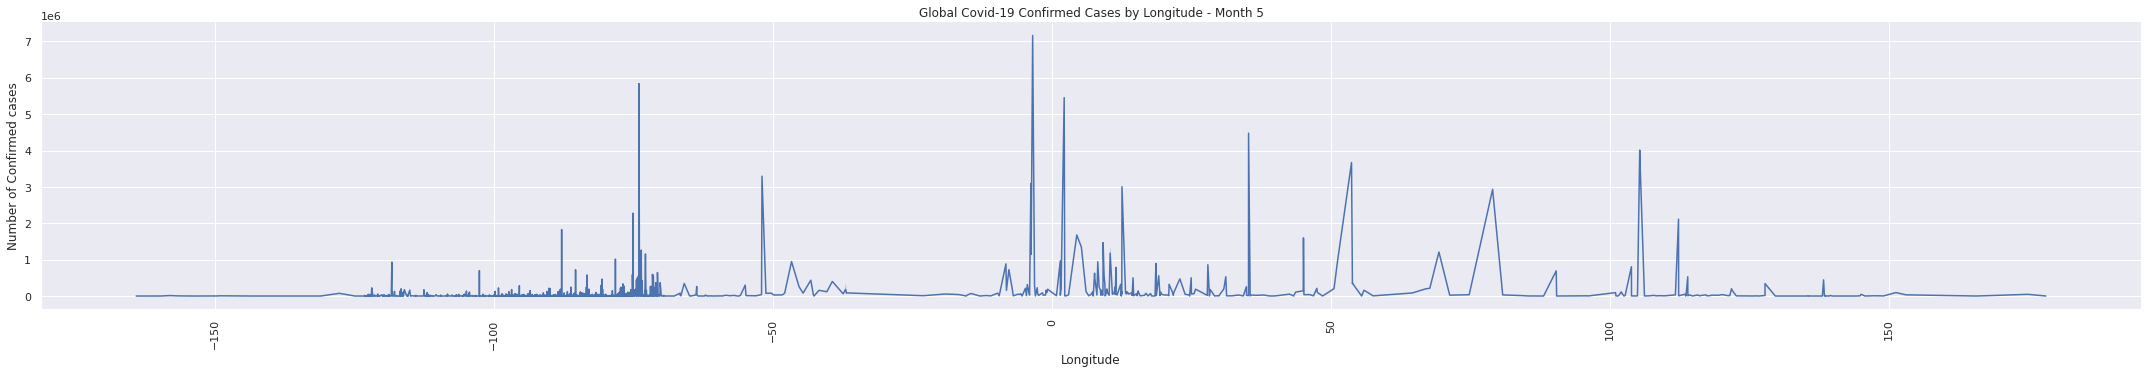

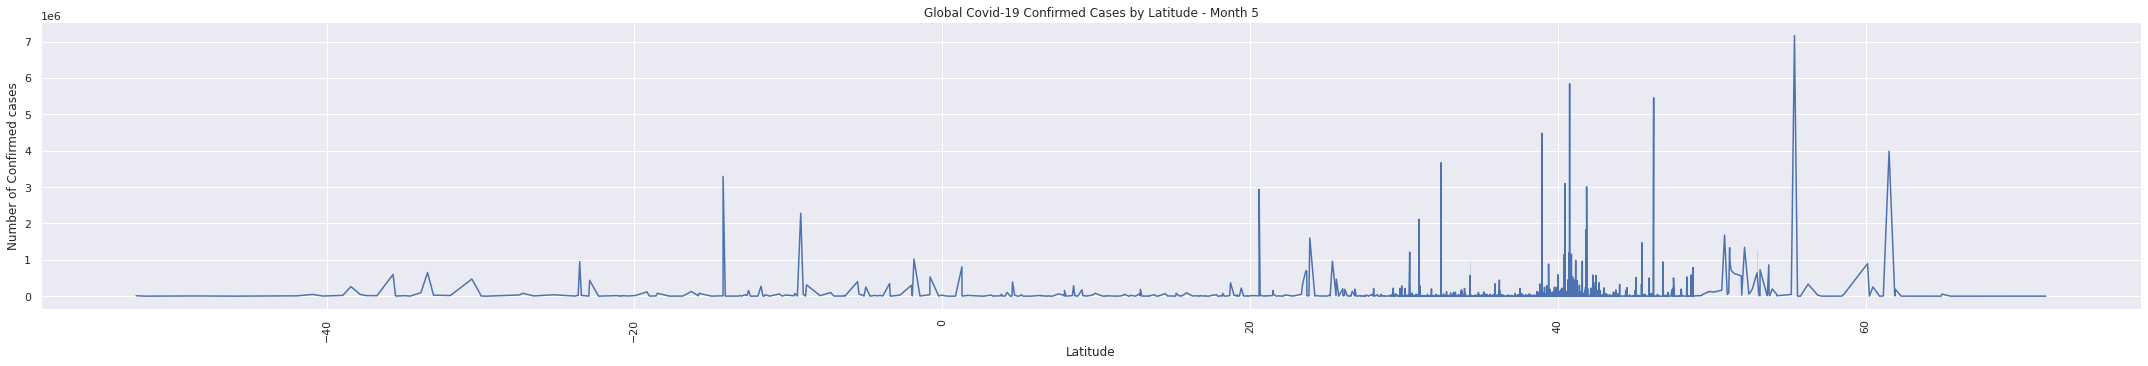

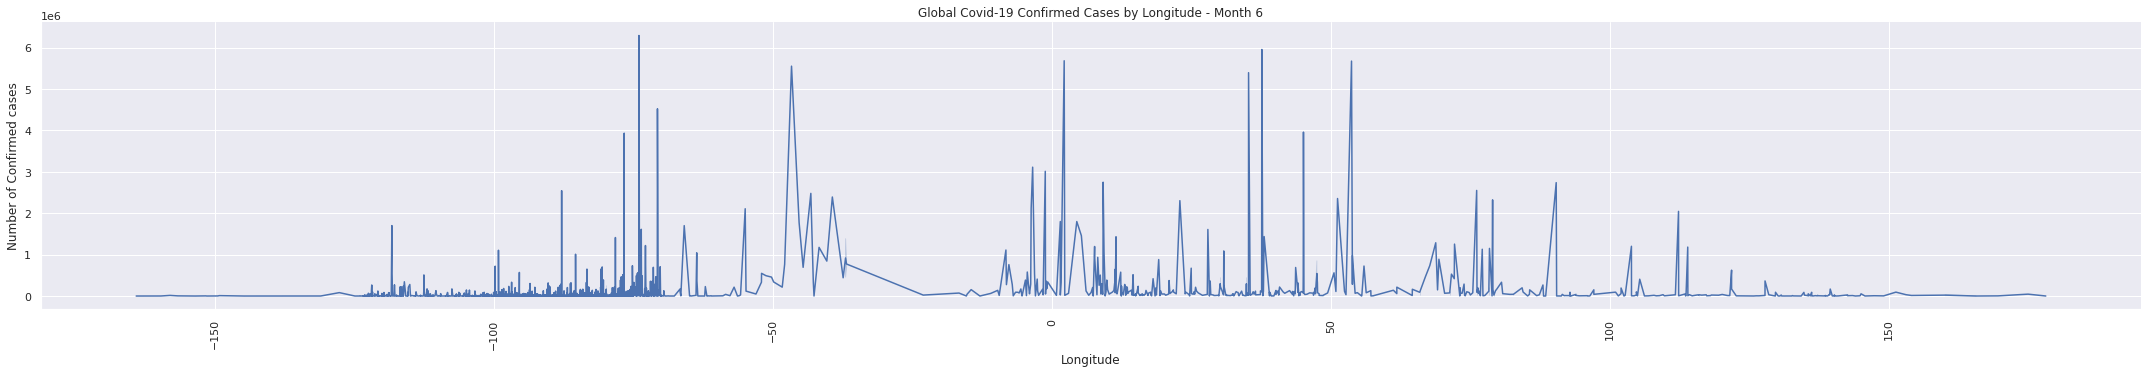

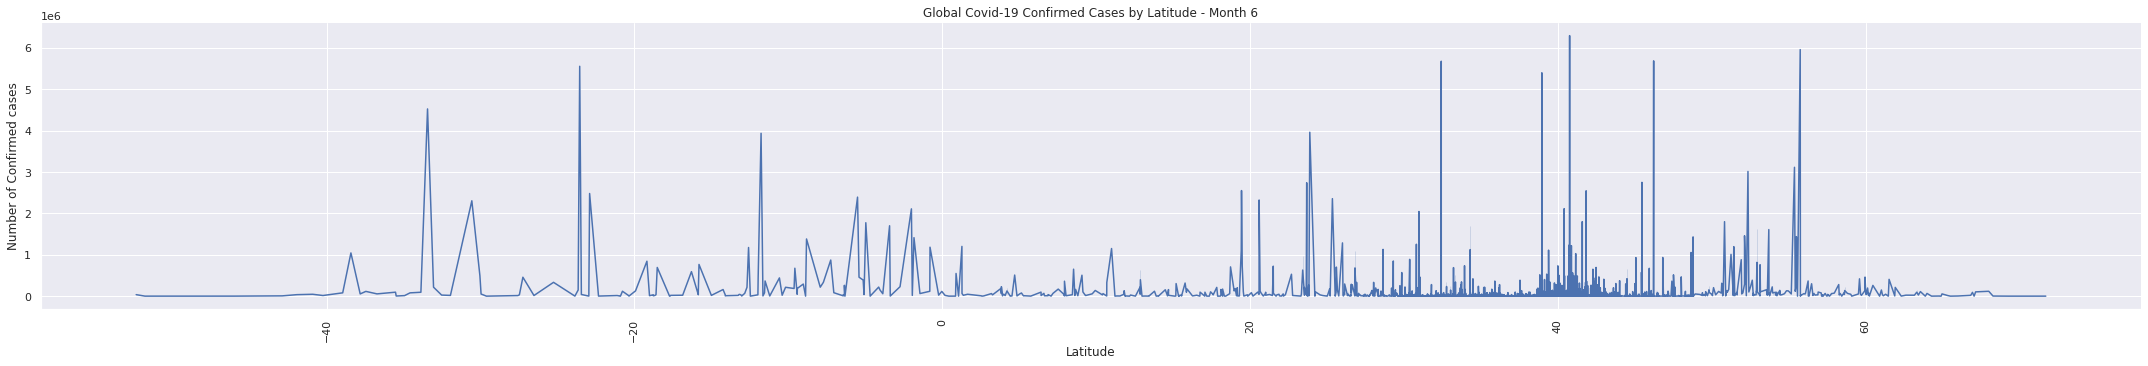

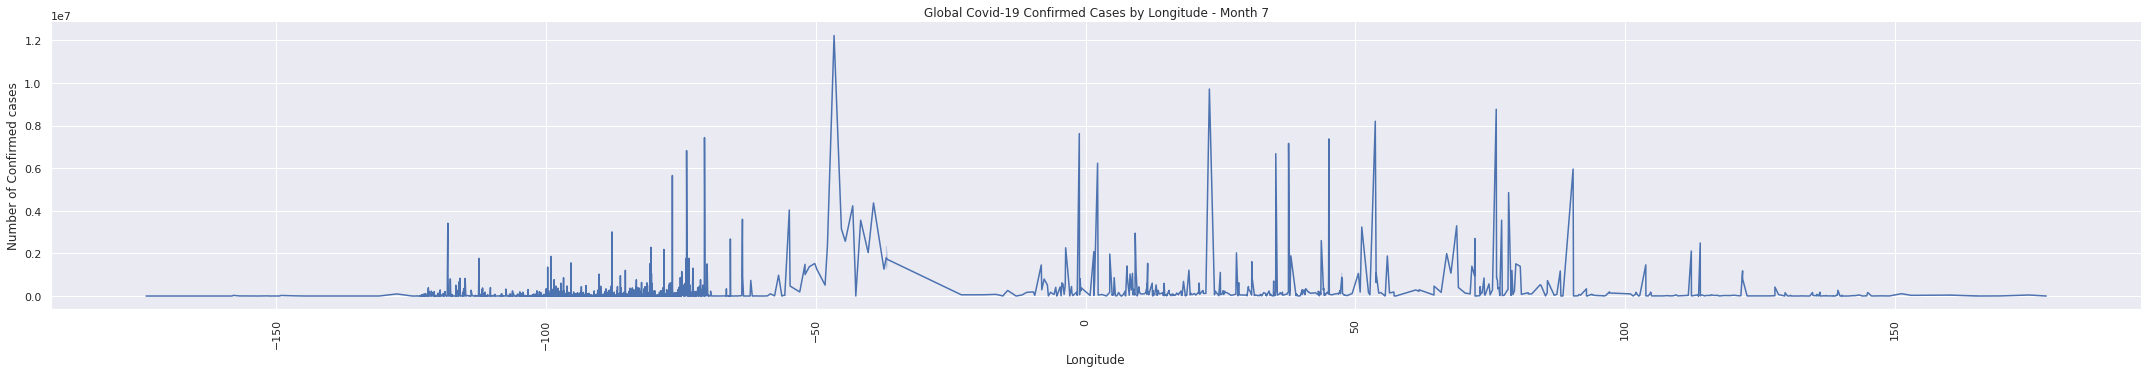

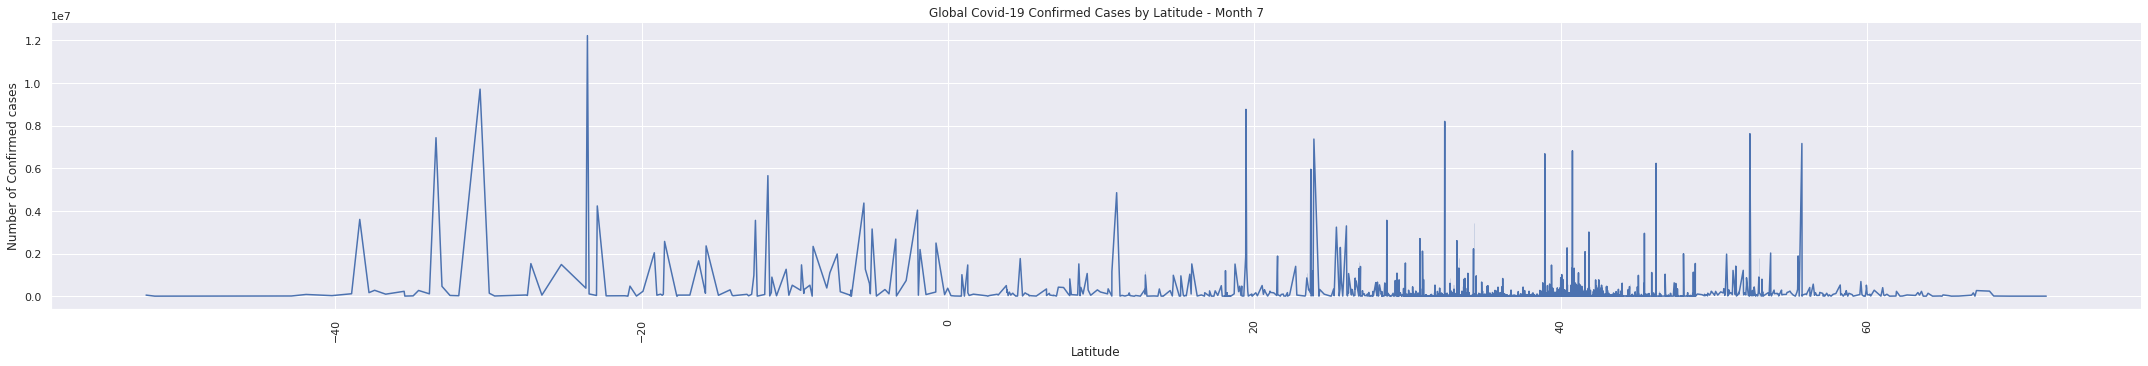

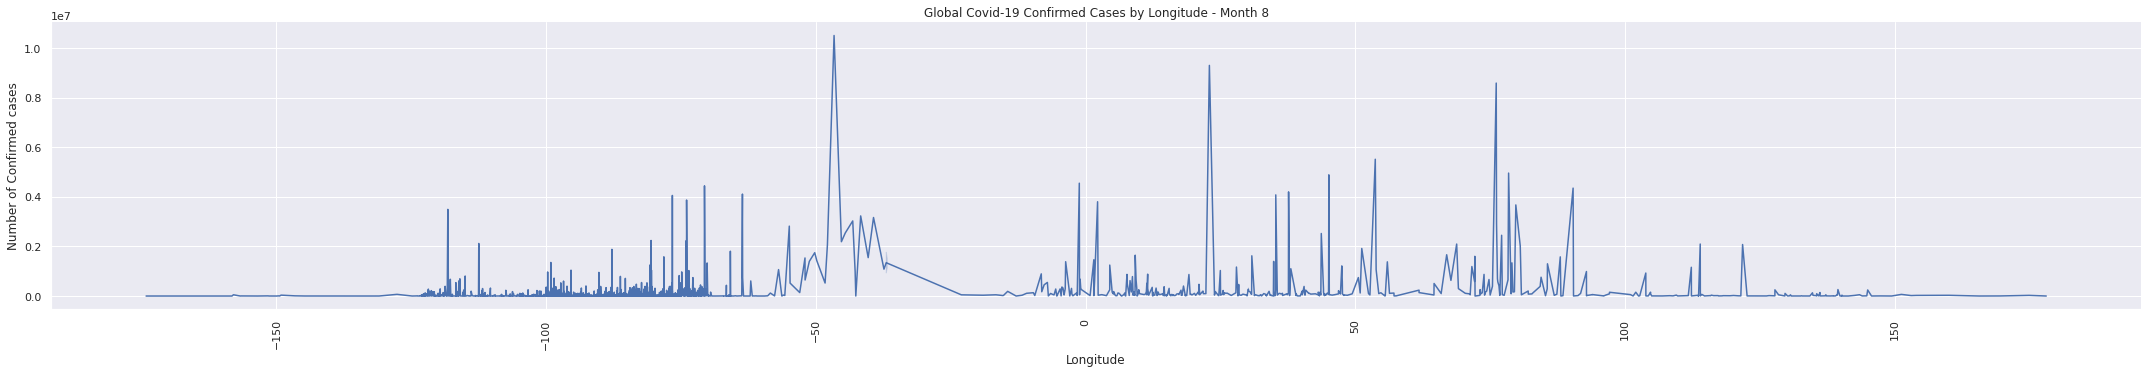

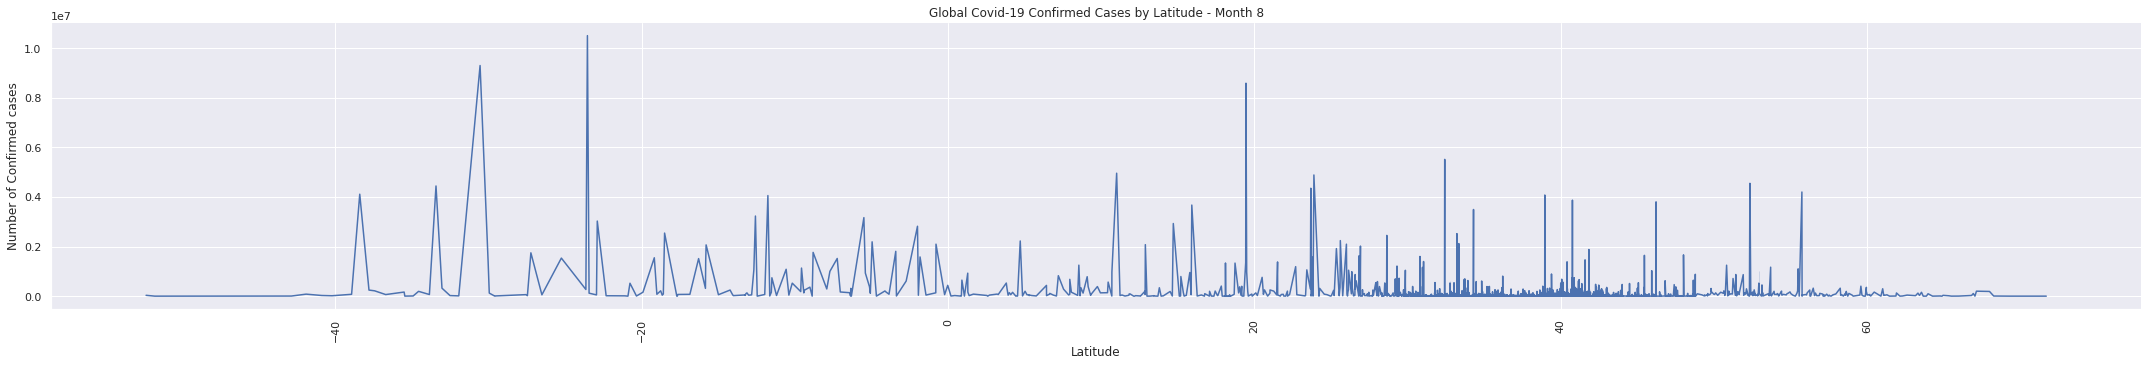

In [18]:
for i in sorted(months):
  long_plot_by_month(df, i, 'Confirmed')
  lat_plot_by_month(df, i, 'Confirmed')

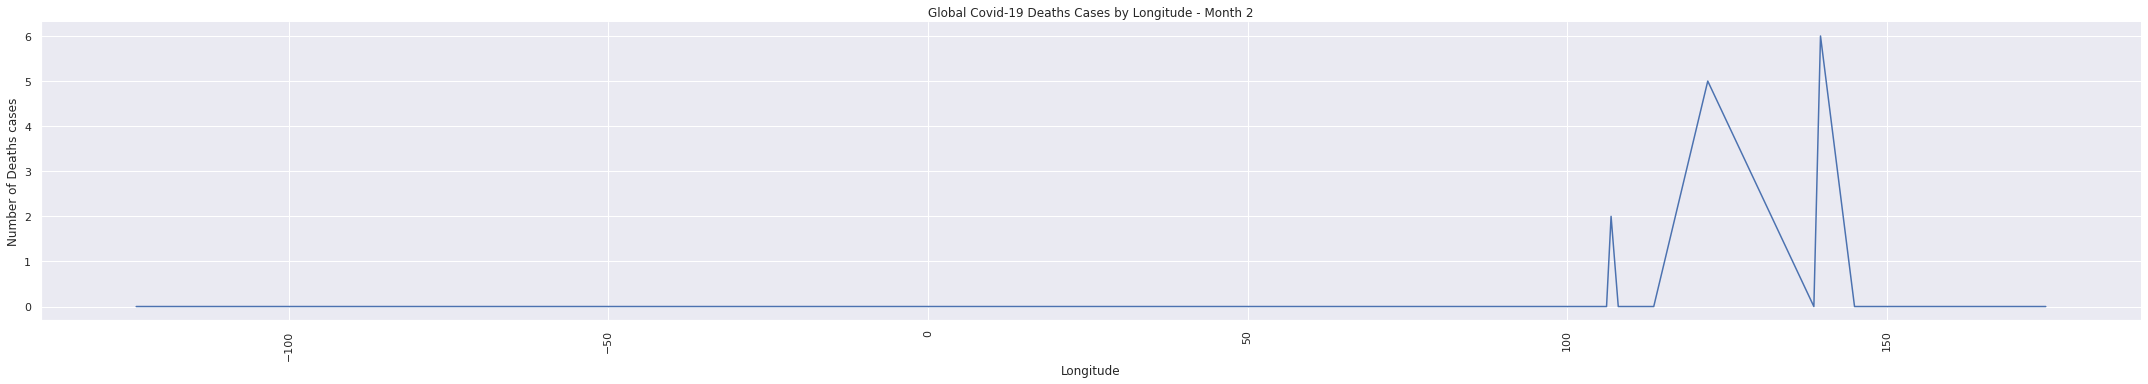

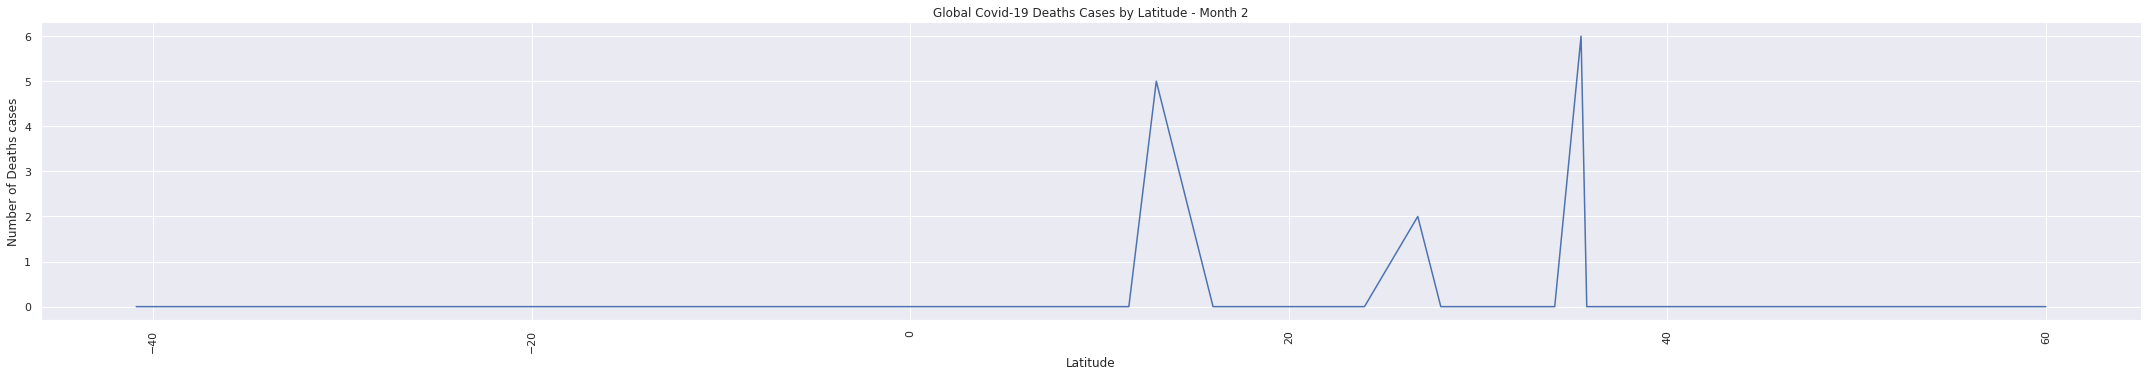

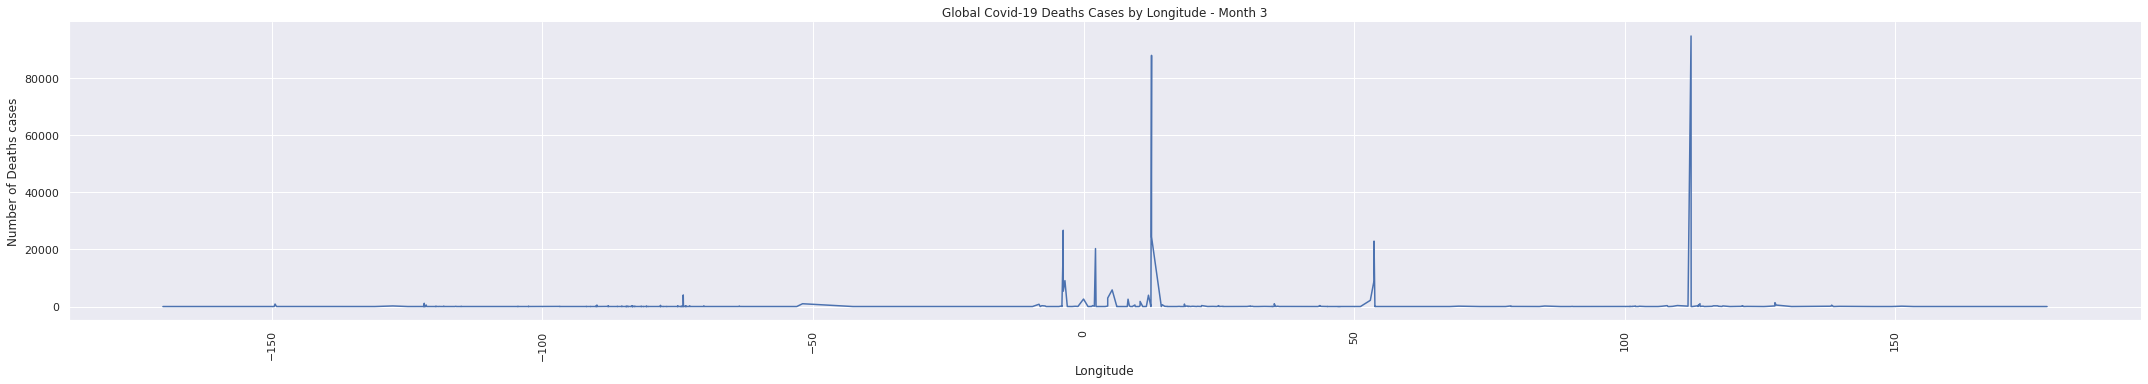

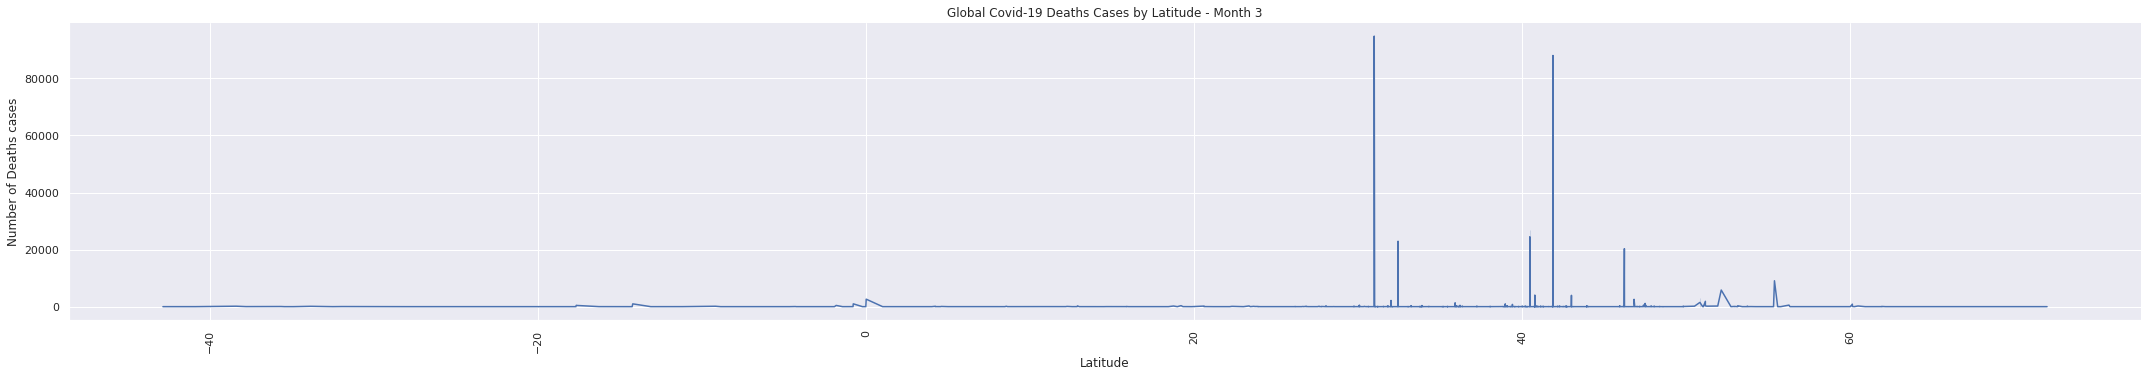

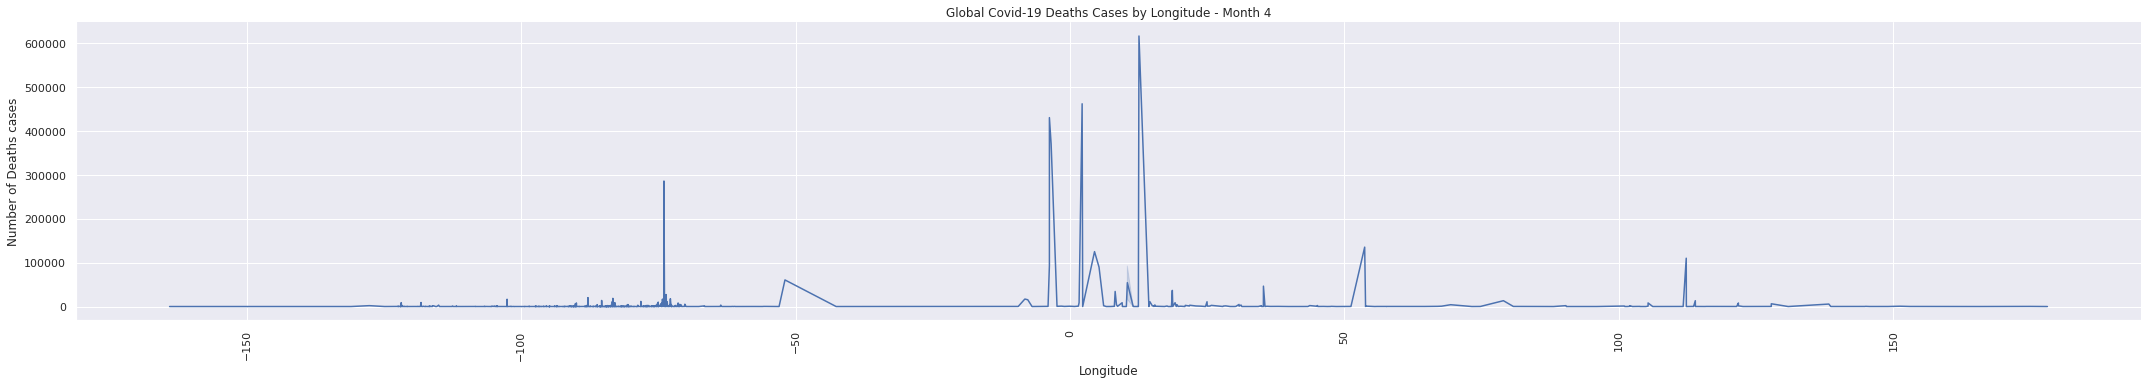

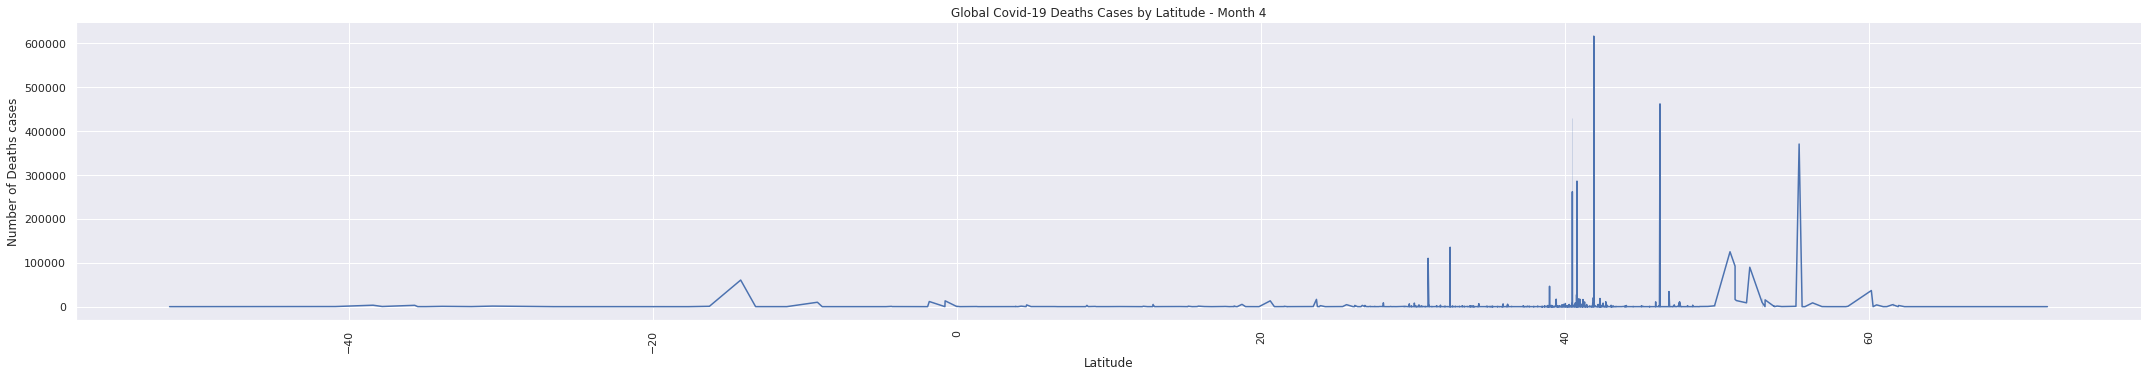

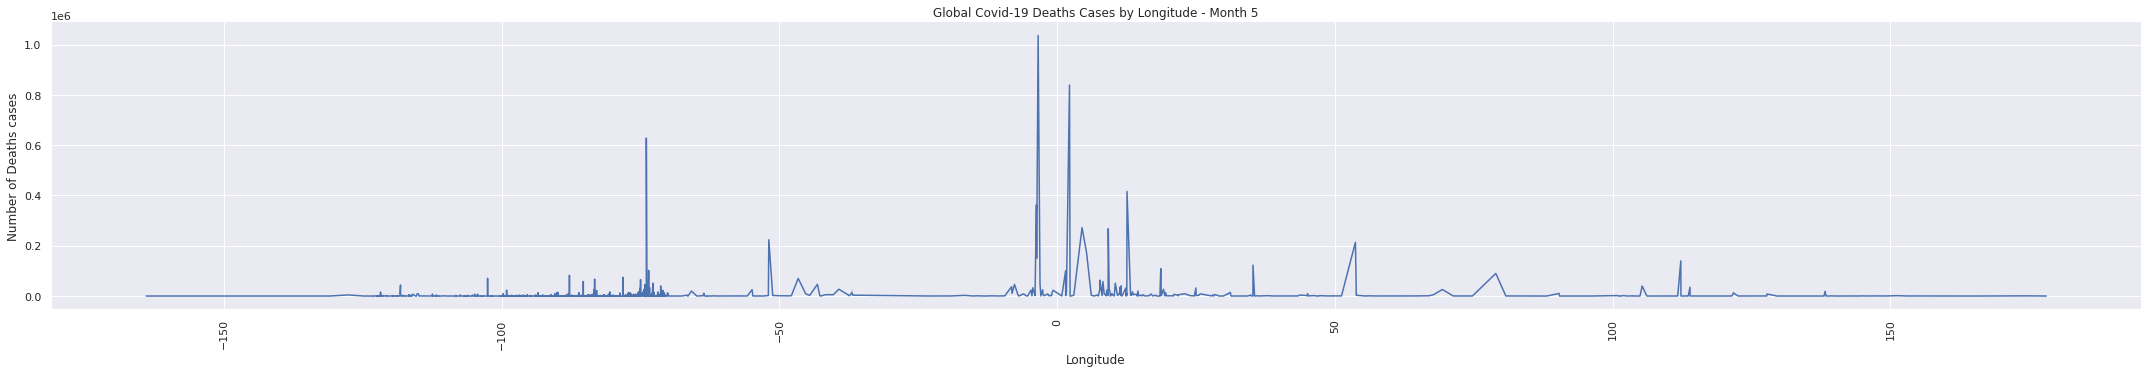

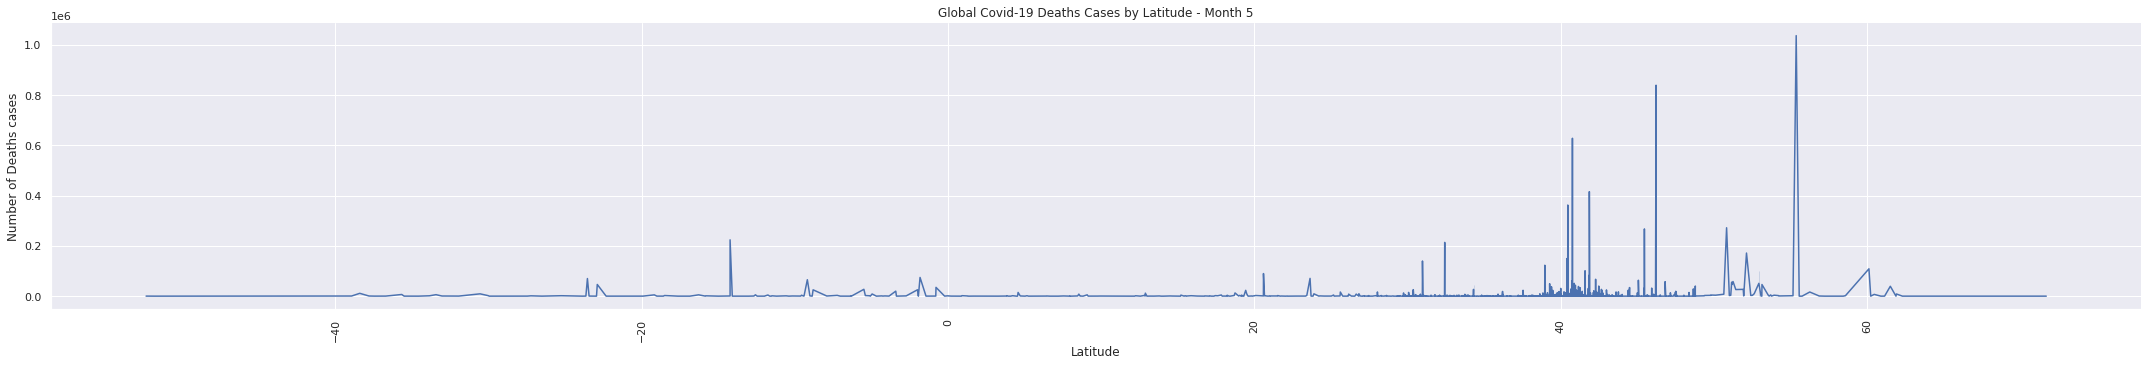

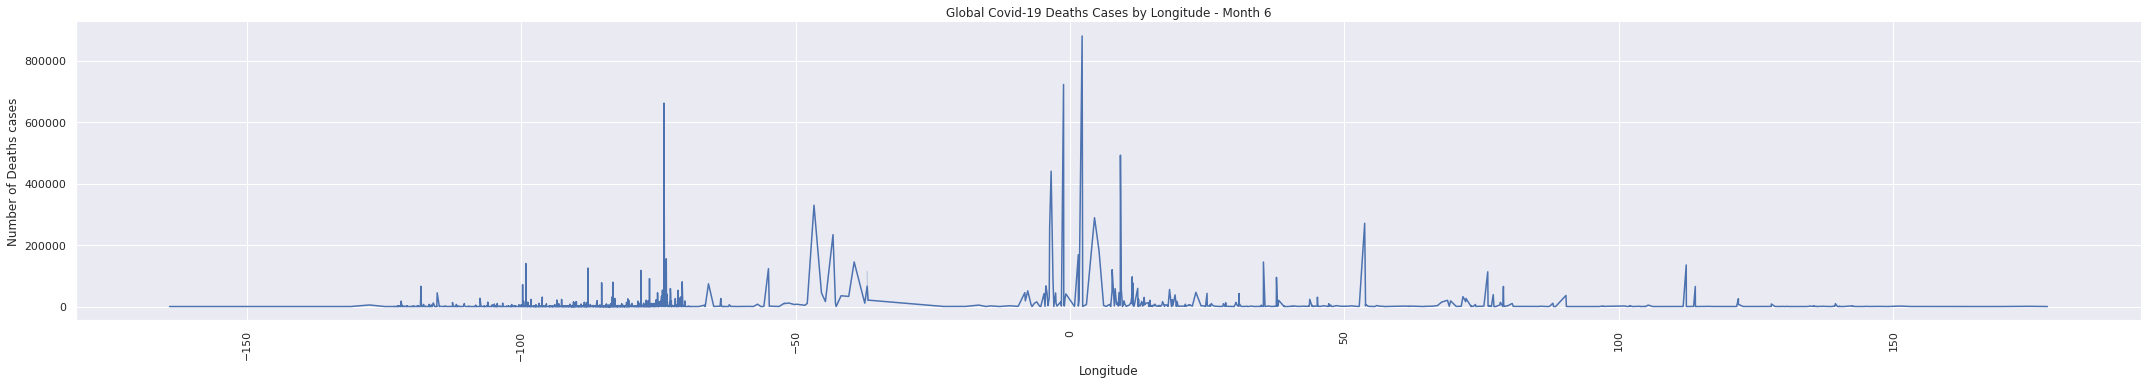

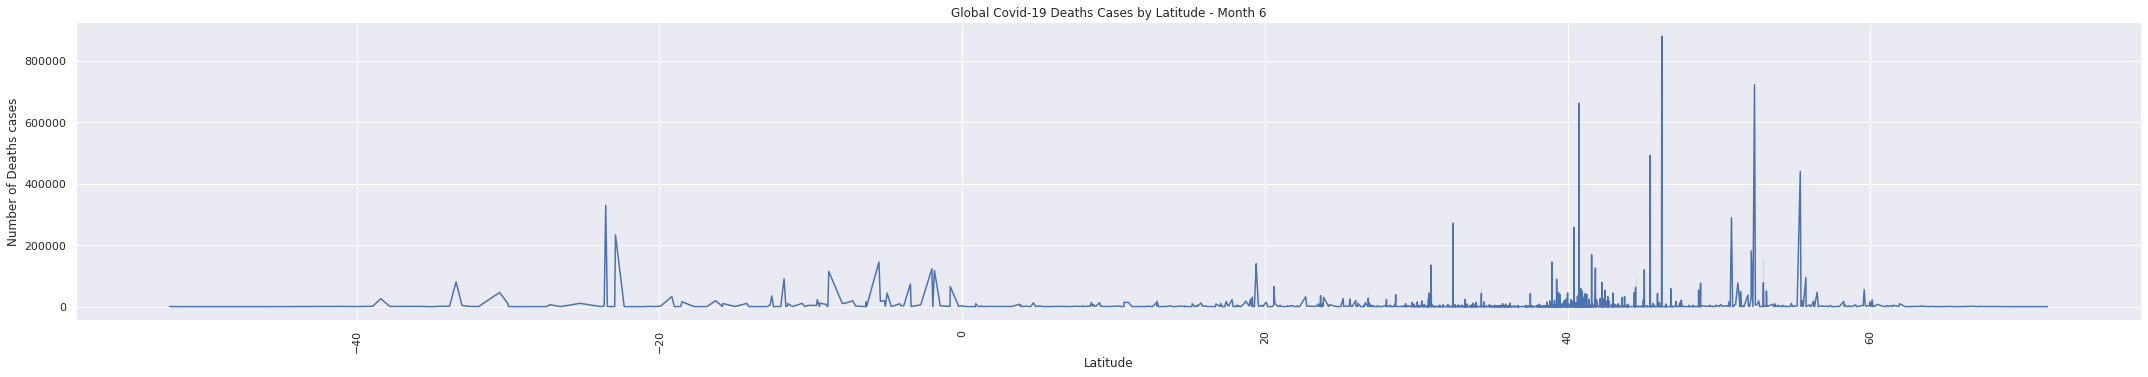

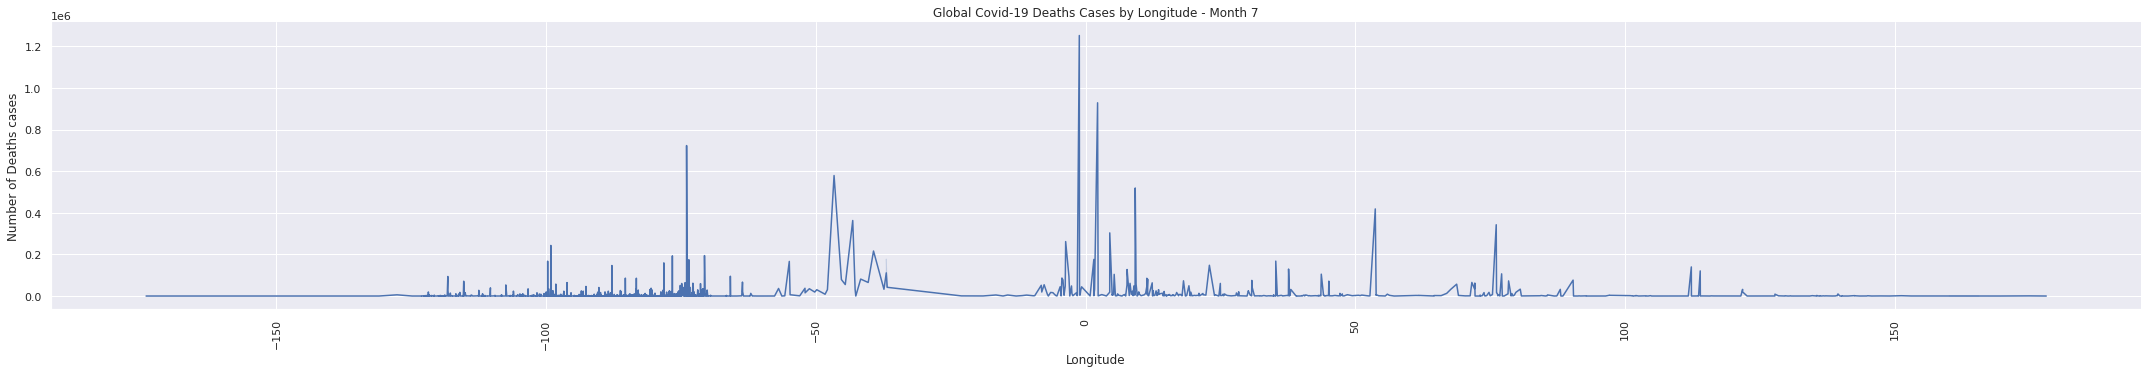

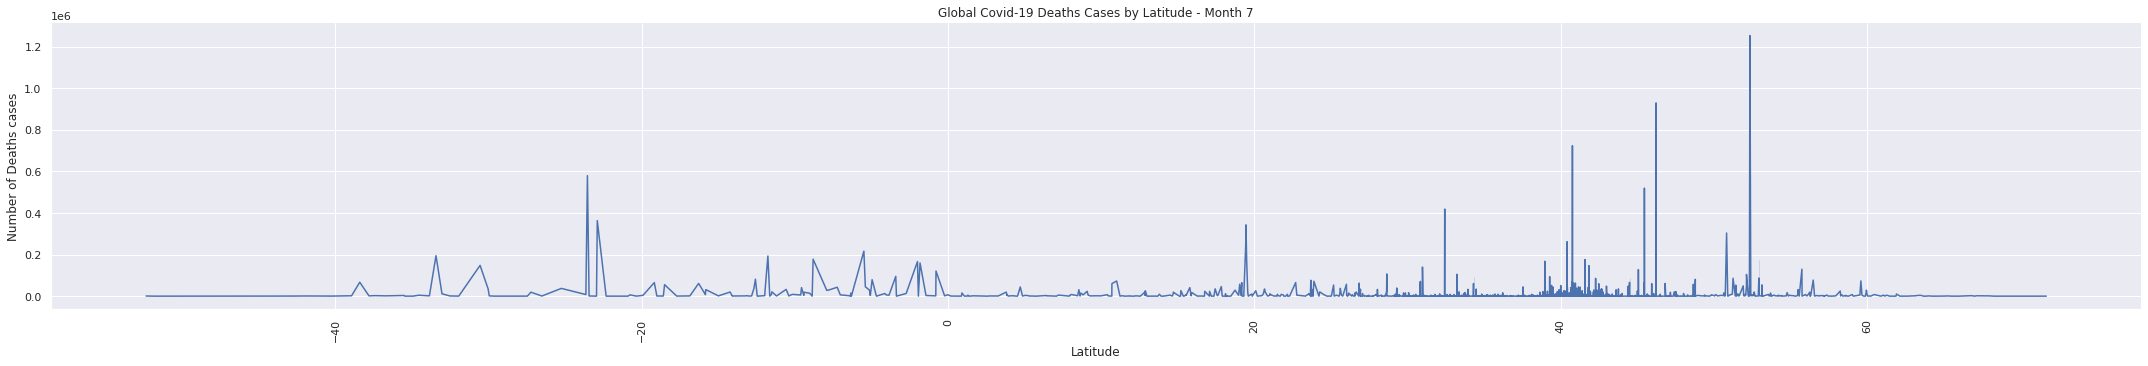

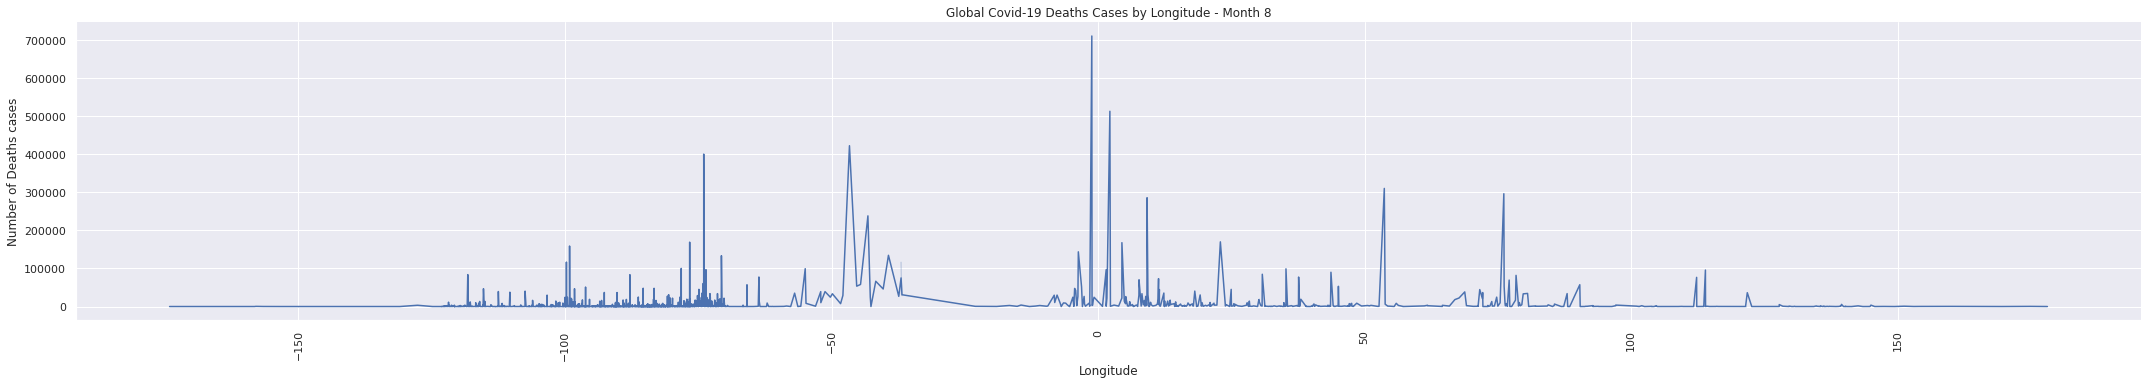

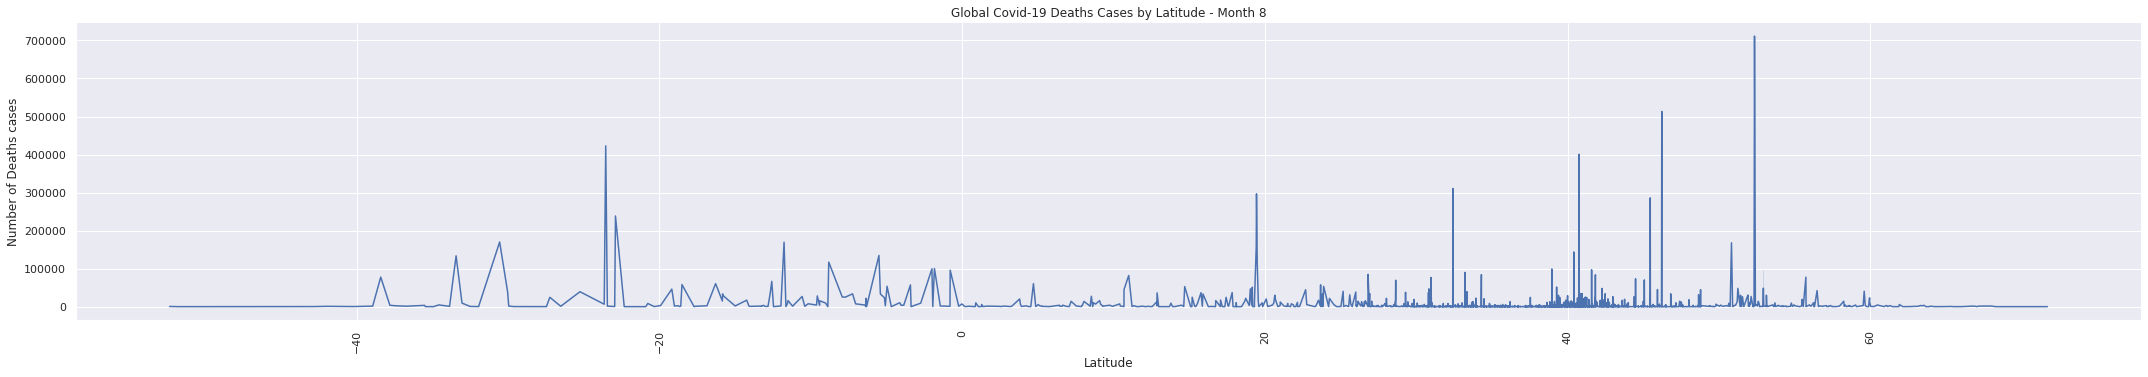

In [19]:
for i in sorted(months):
  long_plot_by_month(df, i, 'Deaths')
  lat_plot_by_month(df, i, 'Deaths')
    

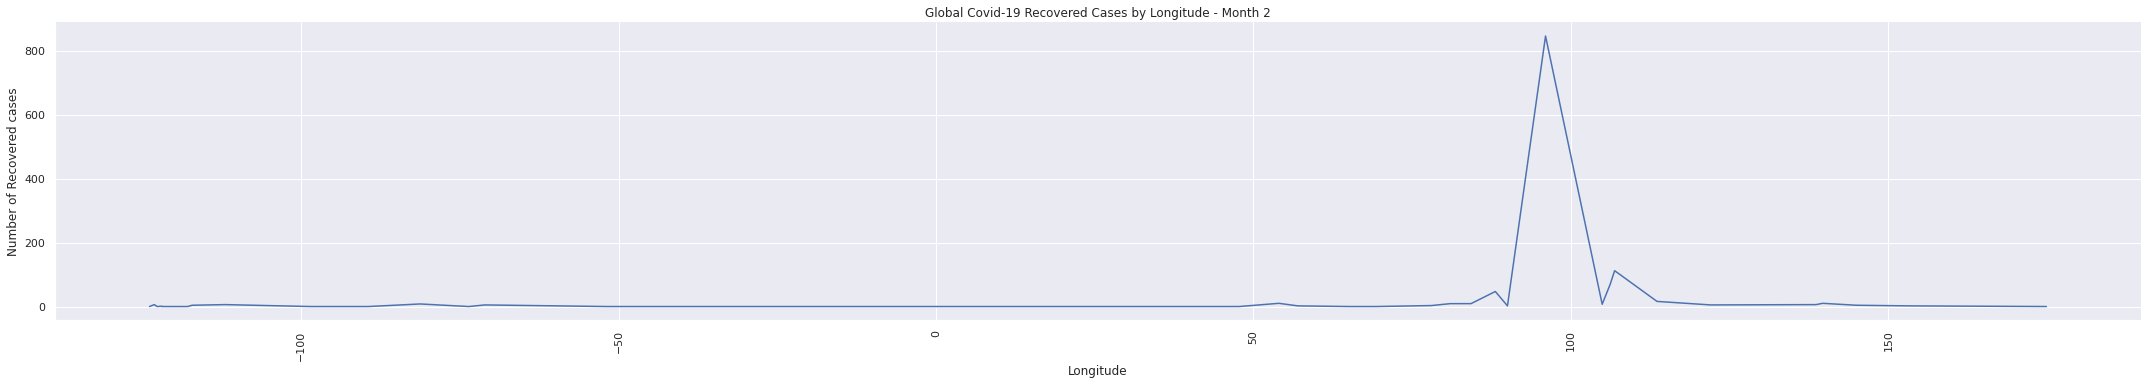

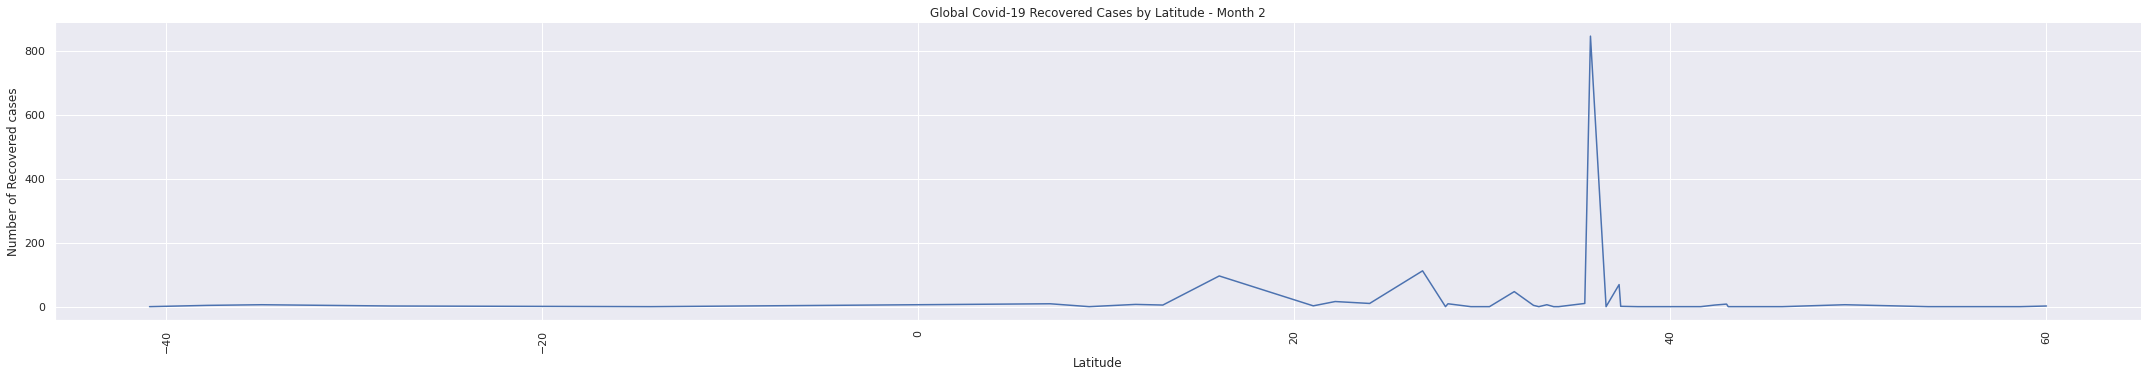

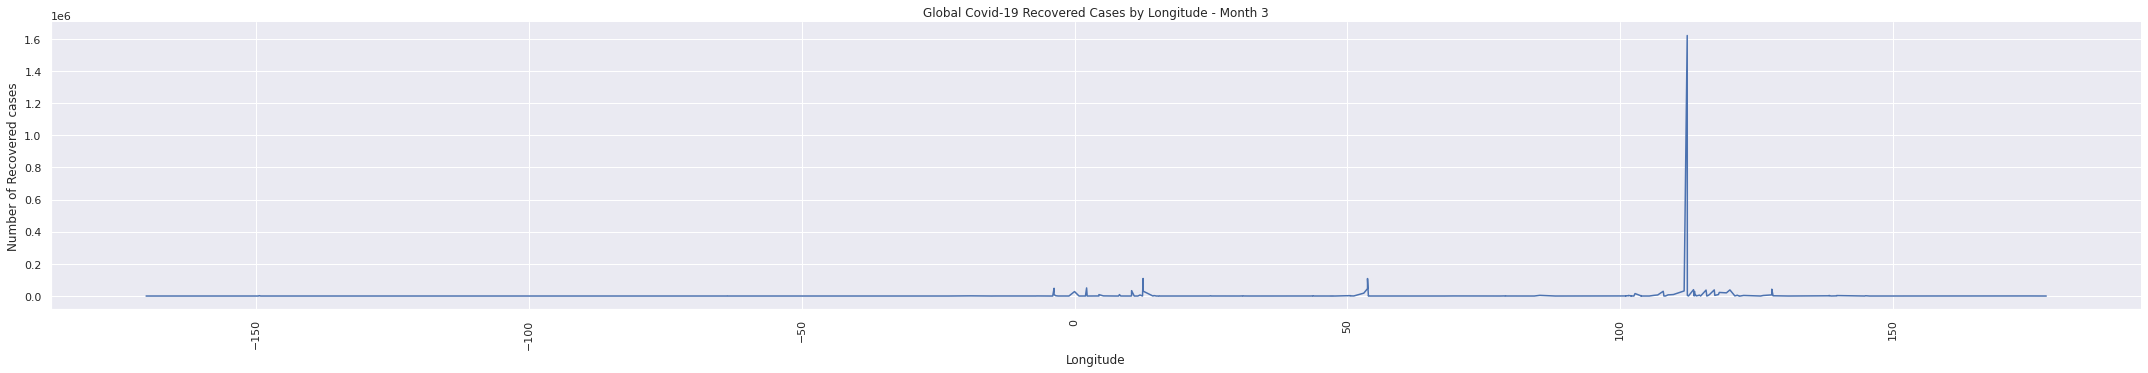

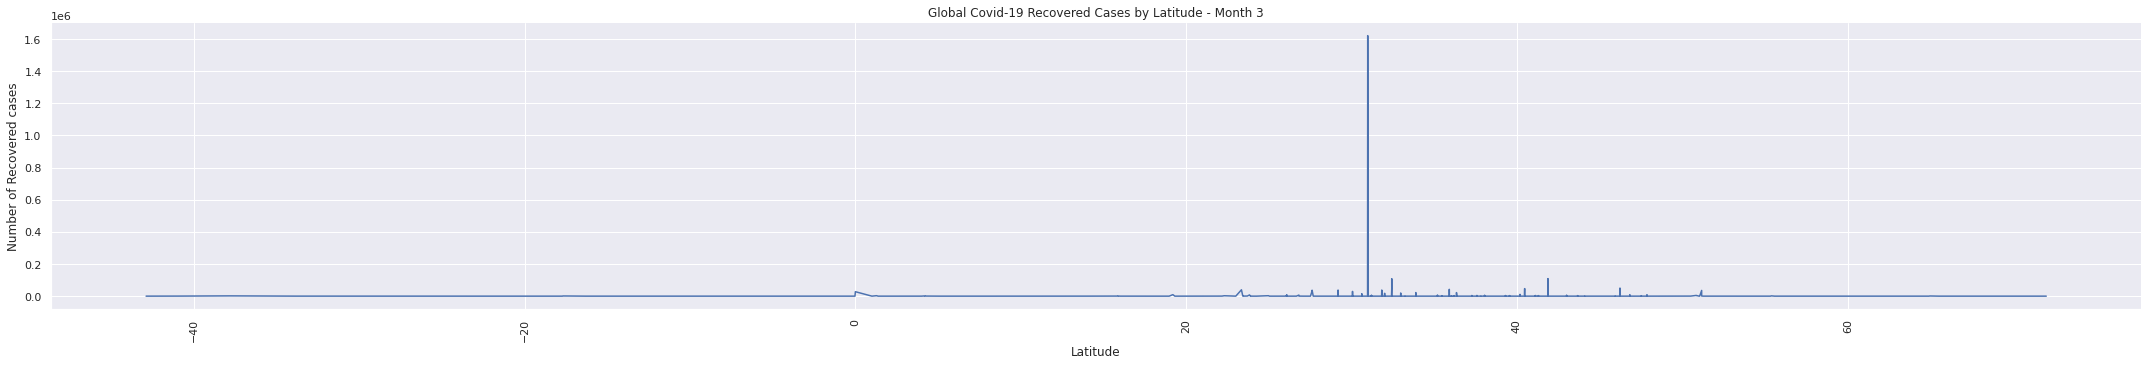

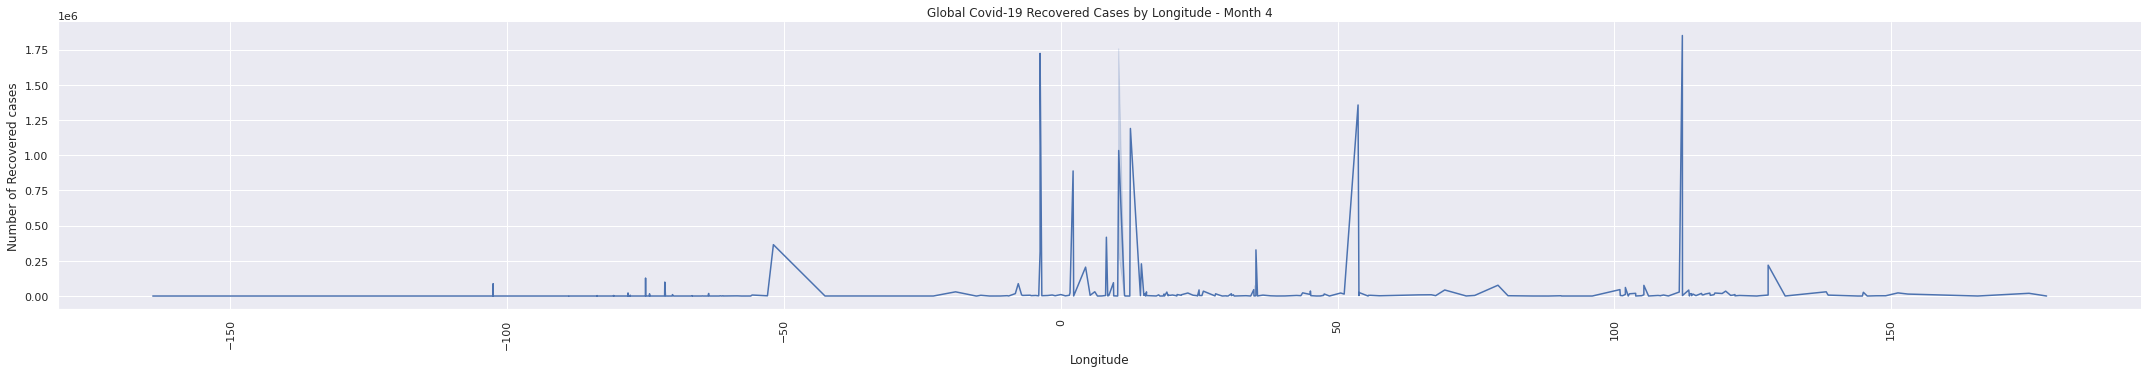

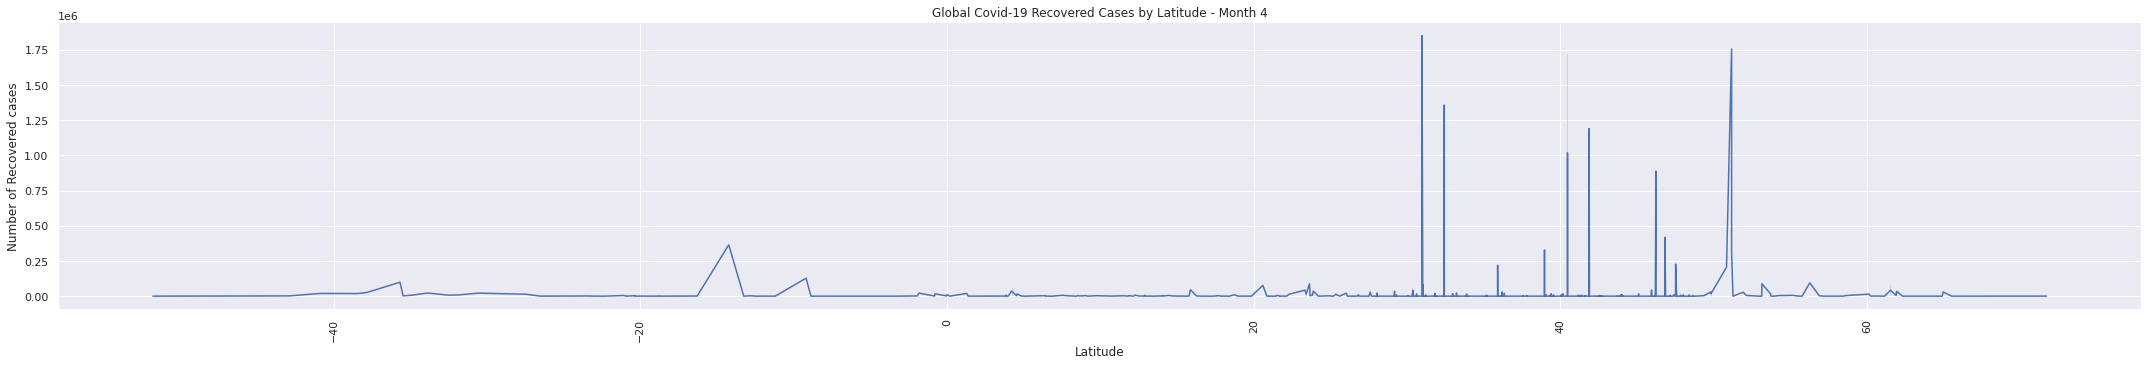

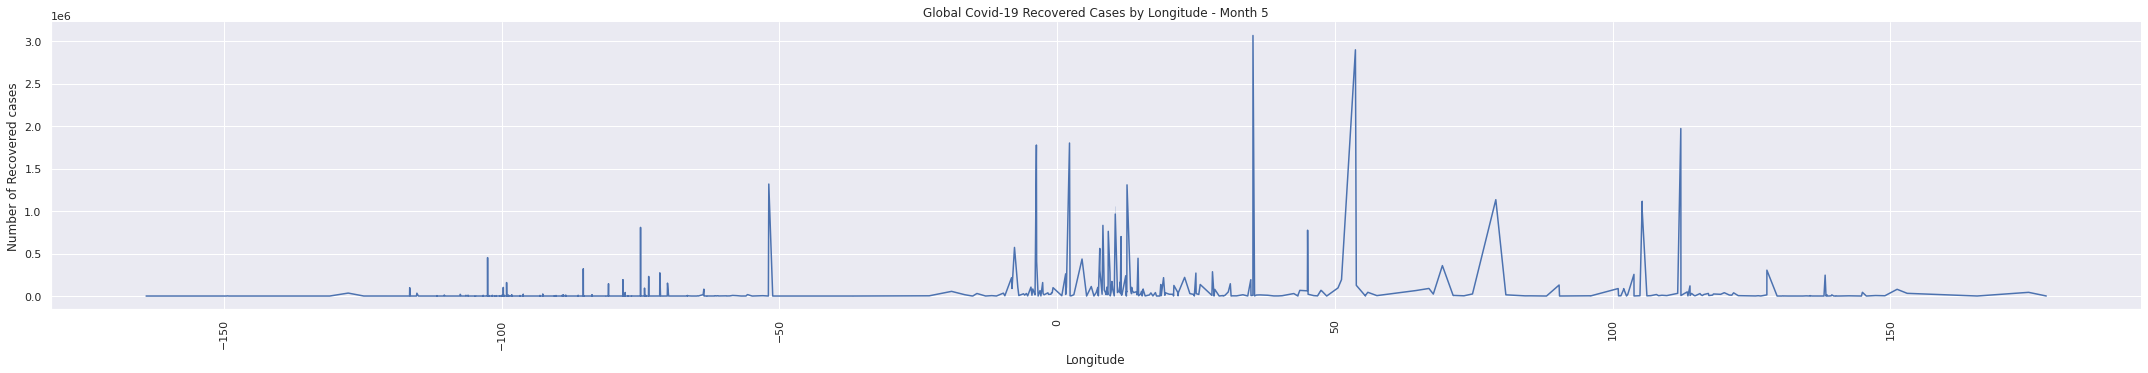

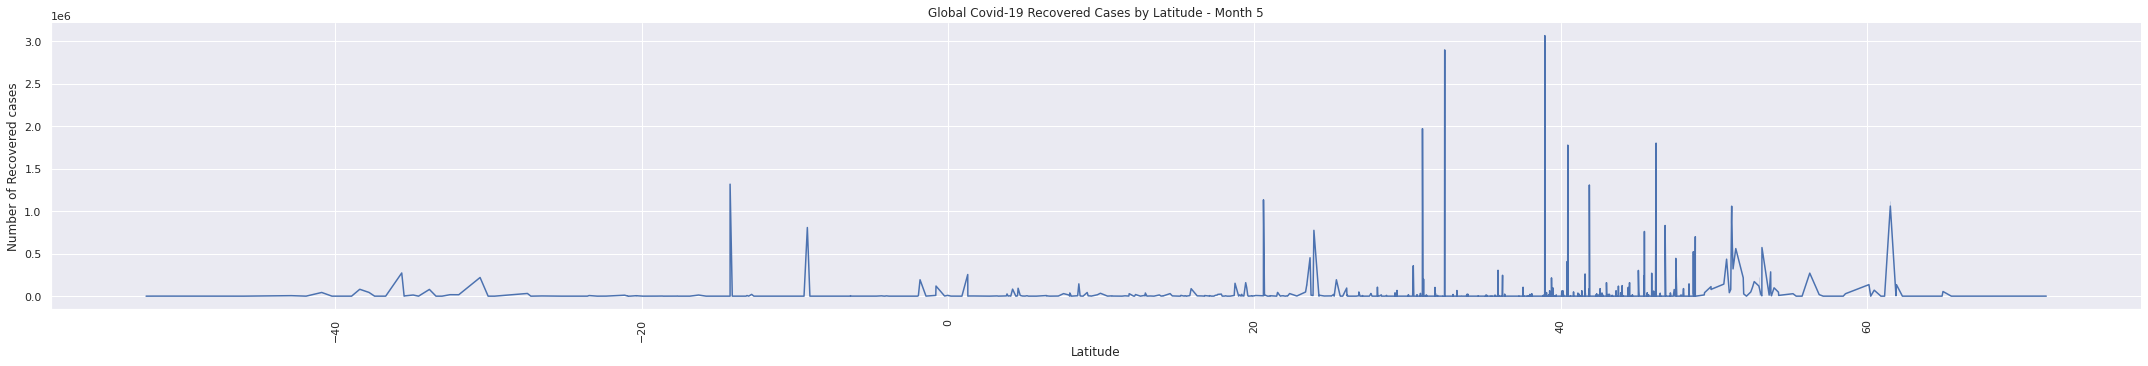

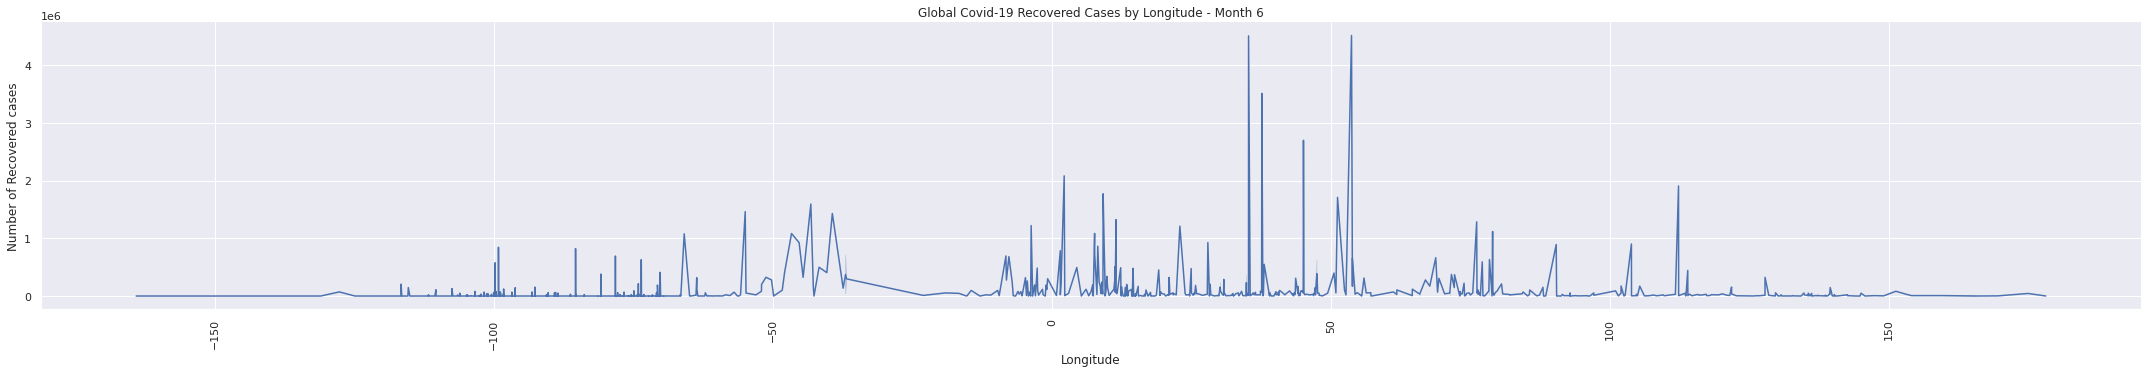

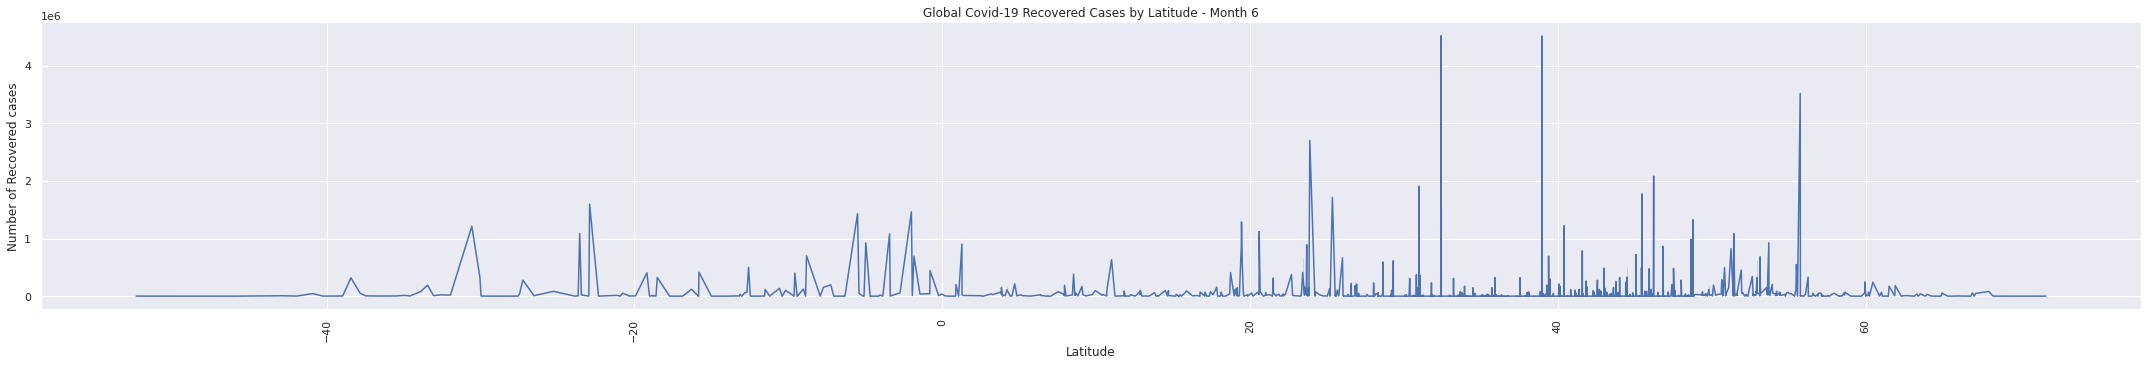

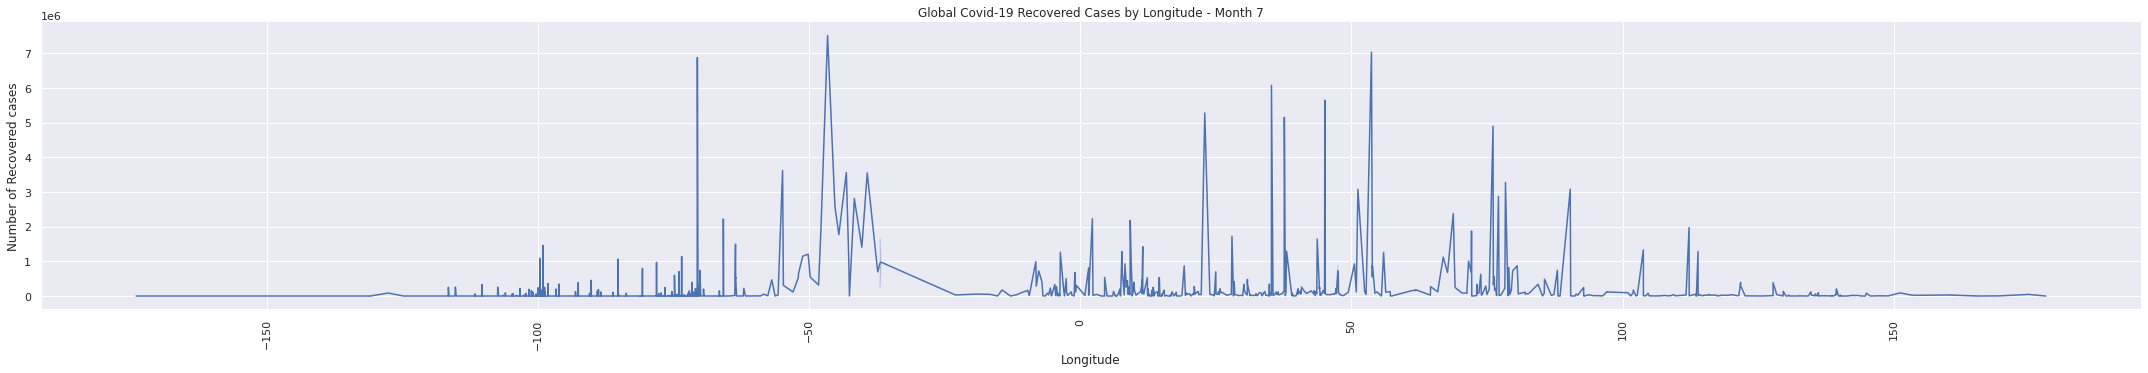

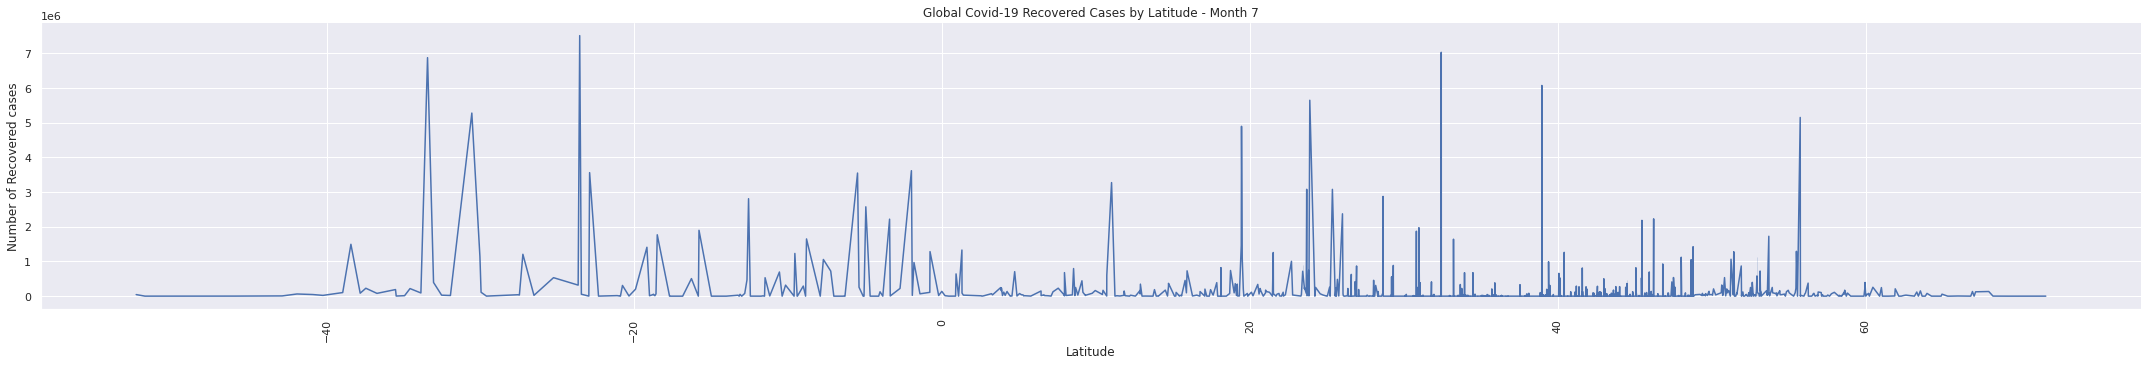

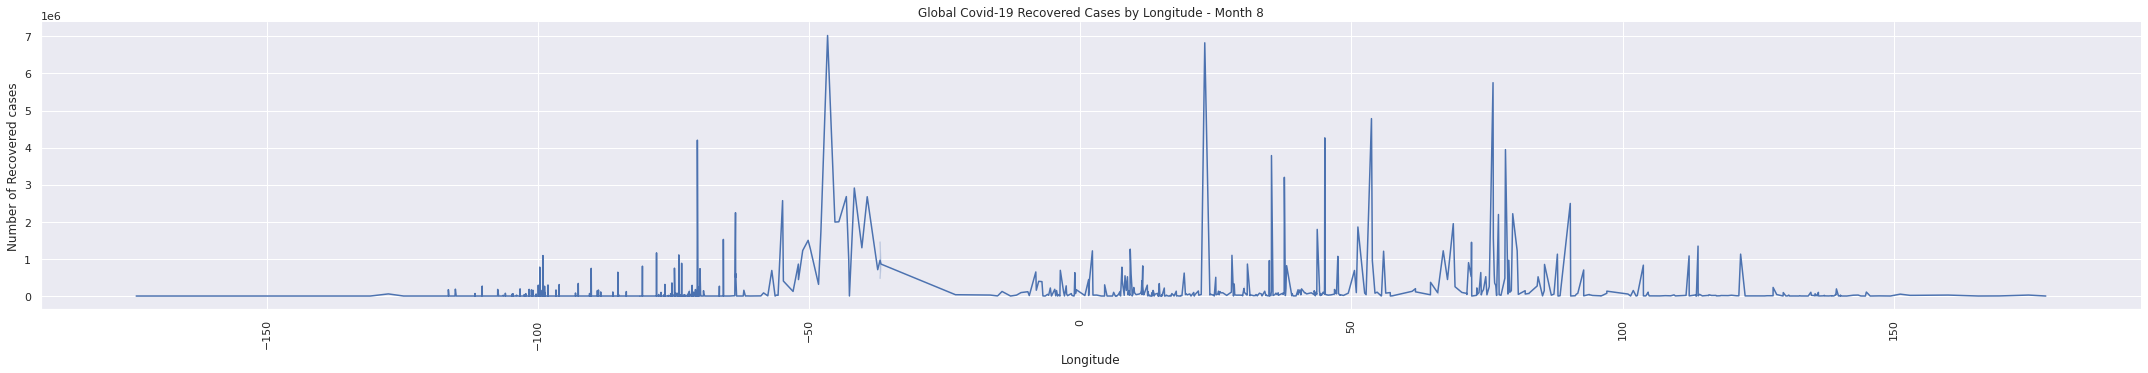

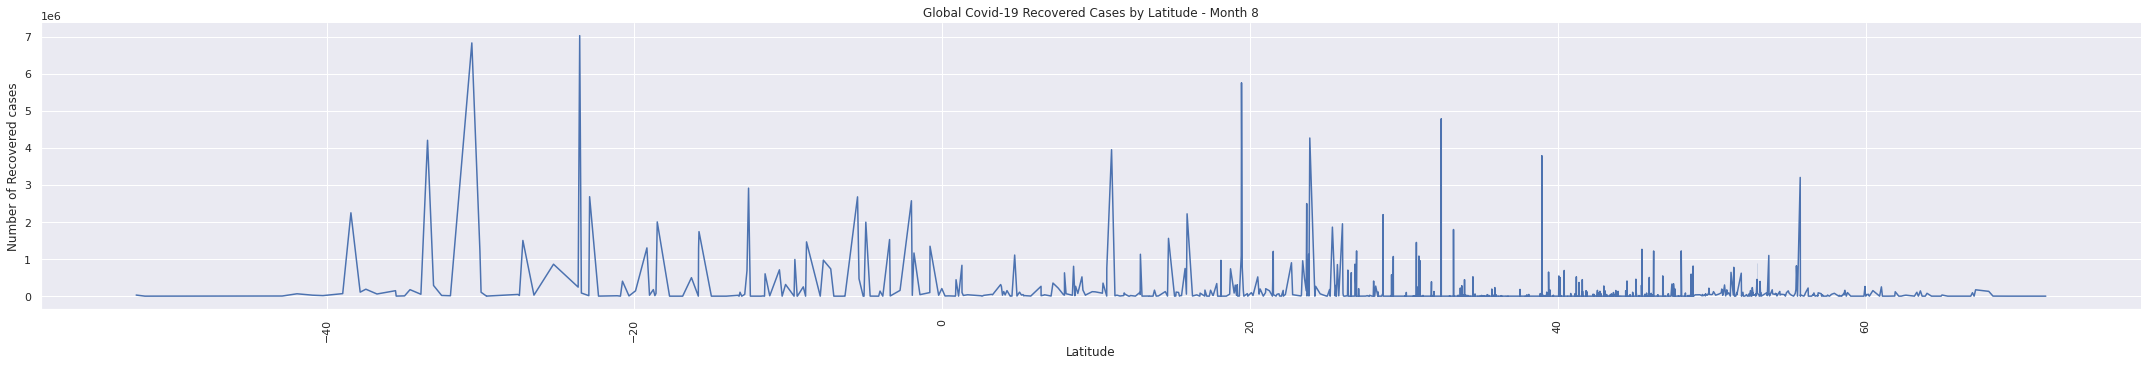

In [20]:
for i in sorted(months):
  long_plot_by_month(df, i, 'Recovered')
  lat_plot_by_month(df, i, 'Recovered')

In [ ]:
# def ml(df, m, t):
#   df_type = df
#   is_m = df_type['Last_Update'].dt.month == m
#   df_type = df_type[is_m].groupby(['Longitude', 'Latitude'])[t].sum().reset_index(name=t) 
#   model = LinearRegression()
#   model.fit(df_type['Longitude'], df_type[t])
#   pred = model.predict
# ml(df, 5, 'Confirmed')